<div style="width:100%;text-align: center;">
    <img src="https://media-exp1.licdn.com/dms/image/C4D0BAQHrgk0foyuJvw/company-logo_200_200/0/1559125976448?e=2159024400&v=beta&t=NtJQpfX1B73q4yoE8sy2dBTXfaGAPdmtVeu3JVe2Nf8" width = 100>
<center><em></em></center>
    Ecole nationale de la Statistique et de l'Analyse économique Pierre NDIAYE<br>ENSAE - Dakar
    <br>
    <br>
   ***************
    <br>
    <br>
   <h1 style = "text-align:center;color:Blue;font-family:algerian;font-size:35px;">Projet de Machine Learning 2 : Groupe 3</h1>
<h1 style = "text-align:center;color:Blue;font-family:algerian;font-size : 20 px;">Bank Chunk Scoring</h1>
    <br>
    <br>
    ***************
    <br>
</div>

<div style="width:100%;text-align: center;">
    <img src="https://th.bing.com/th/id/OIP.ieXvPgnScBJhhMLSJi62dAHaDt?rs=1&pid=ImgDetMain" style="width:90%;height:100%;" /> <br>
    <span style="font-size:20px;"><strong>BANK CHURN SCORING<br></strong></span>
</div>
    <br>
    <br>
<div style="display:flex;">
<div style="width:50%;text-align: left;">
   <span style="font-size:20px;">
       <strong>Présenté par </strong>: <br>
            <br>
           KUISSU CHEGAING Esthelle Paloma <br>
           Abdoulaye NDIAYE <br>
           Aissata GUEYE <br>
           
           
</div>

<div style="width:50%;text-align: right;">
   <span style="font-size:20px;">
       <strong>Sous l'encadrement de</strong> : <br>
           Mously DIAW
    </span>
</div>
</div>

<div style="width:100%;text-align: center;">
<strong>Juin 2023</strong>
    </div>

<div style="width: 80%; margin: auto;">
    <div style="text-align: left; color: white; font-size: 1.7rem;">
        <b style="text-decoration: underline;">SOMMAIRE</b>
    </div>

<div style="width: 80%; margin: auto;">
    <div style="text-align: left; color: white; font-size: 1.7rem;">
        <b style="text-decoration: underline;">SOMMAIRE</b>
    </div>

- [Introduction](#Introduction)
- [Objectifs](#Objective)
- [Libraries](#Libraries)
- [Paramètrers and Variables](#Parameters-and-Variables)
- [Functions](#Functions)
- [A Quick Look at our Data](#A-Quick-Look-at-our-Data)
- [Analyse des données exploratoires](#Exploratory-Data-Analysis)
    - [Variable cible : Exited](#Target-Variable:-Exited)
    - [Continuous Variables](#Continuous-Variables)
    - [Categorical Variables](#Categorical-Variables)
- [Creating a Test Set](#Creating-a-Test-Set)
- [Data Preprocessing](#Data-Preprocessing)
    - [Prétraitement des données](#Feature-Selection)
  

<br>

<div style="width: 80%; margin: auto;">
    <div style="text-align: left; color: white; font-size: 1.7rem;">
        <b style="text-decoration: underline;">INTRODUCTION</b>
    </div>



Le taux de désabonnement (également appelé attrition client) se produit lorsqu’un client cesse d’utiliser les produits ou services d’une entreprise.

Le taux de désabonnement affecte la rentabilité, en particulier dans les secteurs où les revenus dépendent fortement des abonnements (par exemple, les banques, les fournisseurs de services téléphoniques et Internet, les sociétés de télévision payante, les compagnies d’assurance, etc.). On estime que l’acquisition d’un nouveau client peut coûter jusqu’à cinq fois plus cher que la fidélisation d’un client existant.

Par conséquent, l’analyse du taux de désabonnement des clients est essentielle car elle peut aider une entreprise à :

- Identifier les problèmes de ses services (p. ex., produits ou services de mauvaise qualité, mauvais soutien à la clientèle, mauvais public cible, etc.) ;
- Prendre les bonnes décisions stratégiques qui conduiraient à une plus grande satisfaction des clients et, par conséquent, à une plus grande fidélisation des clients.

If you would like to know more about this topic, please refer to the references in the [Bibliography](#Bibliography) section.

<br>

# Objectifs

L'objectif de ce travail est de comprendre et de prédire le taux de désabonnement des clients d'une banque. Plus précisément, nous allons d'abord effectuer une **analyse exploratoire des données** (**EDA**) afin d'identifier et de visualiser les facteurs contribuant à la perte de clients. Cette analyse nous aidera ensuite à construire des modèles de **Machine Learning** pour prédire si un client se désabonnera ou non. 
 
Ce problème est une tâche typique de **classification**. La tâche ne précise pas quelle mesure de performance utiliser pour optimiser nos modèles d'apprentissage automatique. 
<br>

*Procédure suivie  : Analyse exploratoire des données, visualisation des données, prétraitement des données (détection de valeurs manquantes et de valeurs abérrantes, sélection des caractéristiques) et statistiques descriptives et test de .*


<br>

# IMPORTATION DES BIBLIOTHEQUES

In [1]:
!pip install matplotlib seaborn pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')

# Statistics
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<br>

# PARAMETRES ET VARIABLES

Il convient de définir certains paramètres et variables (par défaut) pour l'ensemble du carnet.  

In [2]:
font_size = 20
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size + 2
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size - 2

colors = ['#00A5E0', '#DD403A']
colors_cat = ['#E8907E', '#D5CABD', '#7A6F86', '#C34A36', '#B0A8B9', '#845EC2', '#8f9aaa', '#FFB86F', '#63BAAA', '#9D88B3', '#38c4e3']
colors_comp = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey']

random_state = 42
scoring_metric = 'recall'
comparison_dict, comparison_test_dict = {}, {}

print('✔️ Default Parameters and Variables Set!')

✔️ Default Parameters and Variables Set!


<br>

# Fonctions

Comme nous allons réutiliser des parties du code, il sera utile de définir certaines fonctions.

## `plot_continuous()`

In [3]:
def plot_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    df_func = train_df.copy()
    df_func['Exited'] = df_func['Exited'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, color, label in zip([df_retained, df_churned], colors, ['Retained', 'Churned']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='Exited', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Retained', 'Churned'])
    
    plt.tight_layout();


print('✔️ Function Defined!')

✔️ Function Defined!


## `plot_categorical()`

In [4]:
def plot_categorical(feature):
    '''For a categorical feature, plot a seaborn.countplot for the total counts of each category next to a barplot for the churn rate.'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Exited',
                  data=train_df,
                  palette='husl',
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Exited',
                data=train_df,
                palette='husl',
                ax=ax2)
    ax2.set_ylabel('Churn rate')

    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticks([0, 1])  # Définir les positions des marques sur l'axe des x
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticks([0, 1])  # Définir les positions des marques sur l'axe des x
        ax2.set_xticklabels(['No', 'Yes'])

    plt.tight_layout()
    plt.show()

print('✔️ Fonction définie!')

✔️ Fonction définie!


In [5]:
def hist_continuous(feature):
    '''Plot a histogram and boxplot for the churned and retained distributions for the specified feature.'''
    # Create a histogram for the "Balance" column with specified colors
    fig= plt.figure(figsize=(10, 6))


    histplot = sns.histplot(data=train_df, x=feature, bins=20, color='#26090b', edgecolor='#26090b', kde=True)

    # Set the color for the kernel density line
    histplot.get_lines()[0].set_color('#26090b')

    # Calculate mean and median
    mean_value = train_df[feature].mean()
    median_value = train_df[feature].median()

    # Add mean and median lines
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

    # Set labels and title
    #plt.title("Distribution of Balance in df_train with Mean and Median")
    plt.xlabel(feature)
    plt.ylabel("Count")

    # Show legend
    plt.legend()

    plt.show()


print('✔️ Function Defined!')

✔️ Function Defined!


## `plot_conf_mx()`

In [6]:
def plot_conf_mx(cm, ax):
    '''Plot a confusion matrix in the specified axes object.'''
    sns.heatmap(data=cm,
                annot=True,
                cmap='Blues',
                annot_kws={'fontsize': 30},
                ax=ax)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Retained', 'Churned'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['Retained', 'Churned']);


print('✔️ Function Defined!')

✔️ Function Defined!


## `plot_learning_curve()`

In [7]:
def plot_learning_curve(estimator,
                        X,
                        y,
                        ax,
                        cv=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    '''Plot the learning curves for an estimator in the specified axes object.'''
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes,
                    train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std,
                    alpha=0.1,
                    color='dodgerblue')
    ax.fill_between(train_sizes,
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha=0.1,
                    color='darkorange')

    ax.plot(train_sizes,
            train_scores_mean,
            color='dodgerblue',
            marker='o',
            linestyle='-',
            label='Training Score')
    ax.plot(train_sizes,
            test_scores_mean,
            color='darkorange',
            marker='o',
            linestyle='-',
            label='Cross-validation Score')

    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best', fontsize=14);


print('✔️ Function Defined!')

✔️ Function Defined!


## `clf_performance()`

In [8]:
def clf_performance(classifier, classifier_name, classifier_name_abv):
    '''Display the overall performance of a classifier with this template.'''
    print('\n', classifier_name)
    print('-------------------------------')
    print('   Best Score ({}): '.format(scoring_metric) + str(np.round(classifier.best_score_, 3)))
    print('   Best Parameters: ')
    for key, value in classifier.best_params_.items():
        print('      {}: {}'.format(key, value))

    y_pred_pp = cross_val_predict(estimator=classifier.best_estimator_,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict_proba')[:, 1]
    y_pred = y_pred_pp.round()

    cm = confusion_matrix(y_train, y_pred, normalize='true')

    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    comparison_dict[classifier_name_abv] = [
        accuracy_score(y_train, y_pred),
        precision_score(y_train, y_pred),
        recall_score(y_train, y_pred),
        roc_auc_score(y_train, y_pred_pp), fpr, tpr
    ]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    plot_conf_mx(cm, ax1)
    plot_learning_curve(classifier.best_estimator_, X_train, y_train, ax2)

    plt.tight_layout();


print('✔️ Function Defined!')

✔️ Function Defined!


## `plot_feature_imp()

In [9]:
def plot_feature_imp(classifier, classifier_name, color, ax):
    '''Plot the importance of features for a classifier as a barplot.'''
    importances = pd.DataFrame({'Feature': X_train.columns,
                                'Importance': np.round(classifier.best_estimator_.feature_importances_, 3)})

    importances = importances.sort_values('Importance', ascending=True).set_index('Feature')

    importances.plot.barh(color=color,
                          edgecolor='firebrick',
                          legend=False,
                          ax=ax)
    ax.set_title(classifier_name)
    ax.set_xlabel('Importance');


print('✔️ Function Defined!')

✔️ Function Defined!


## test_func()

In [10]:
def test_func(classifier, classifier_name, ax):
    '''Assess the performance on the test set and plot the confusion matrix.'''
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    comparison_test_dict[classifier_name] = [accuracy_score(y_test, y_pred),
                                             precision_score(y_test, y_pred),
                                             recall_score(y_test, y_pred)]

    sns.heatmap(cm,
                annot=True,
                annot_kws={'fontsize': 24},
                cmap='Blues',
                ax=ax)

    ax.set_title(classifier_name)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Retained', 'Churned'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.2, 1.4])
    ax.set_yticklabels(['Retained', 'Churned']);


print('✔️ Function Defined!')

✔️ Function Defined!


<br>

# A Quick Look at our Data

Nous commençons par importer le DataFrame.

In [11]:
train_df = pd.read_csv("C:/Users/USER/Projet_ML2/train.csv", index_col=0)


print('✔️ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(train_df.shape[0], train_df.shape[1]))
train_df.head()

✔️ Dataset Imported Successfully!

It contains 165034 rows and 13 columns.


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Notre base a 14 variables et 165034 observations. La dernière variable, '**Exited**', est la  **variable cible** et indique si le client a quitté la banque ou pas  (0 = No, 1 = Yes). 

Les variables 'RowNumber', 'CustomerId', et 'Surname' sont spécifiques pour chaque client et peuvent donc etre supprimés.

In [12]:
#Suppression des doublons
train_df = train_df.drop_duplicates()

In [13]:
train_df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
train_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

La méthode `info()` mnous donne les informations sur le nombre de valeurs non nulles et le type de chaque variable.

## Vue d'ensemble des données et des valeurs manquantes

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 15.1+ MB


| Column             | Description                                                                                   |
|---------------------|-----------------------------------------------------------------------------------------------|
| Customer ID         | A unique identifier for each customer                                                         |
| Surname             | The customer's surname or last name                                                           |
| Credit Score        | A numerical value representing the customer's credit score                                    |
| Geography           | The country where the customer resides (France, Spain, or Germany)                            |
| Gender              | The customer's gender (Male or Female)                                                        |
| Age                 | The customer's age                                                                           |
| Tenure              | The number of years the customer has been with the bank                                       |
| Balance             | The customer's account balance                                                                |
| NumOfProducts       | The number of bank products the customer uses (e.g., savings account, credit card)            |
| HasCrCard           | Whether the customer has a credit card (1 = yes, 0 = no)                                       |
| IsActiveMember      | Whether the customer is an active member (1 = yes, 0 = no)                                     |
| EstimatedSalary     | The estimated salary of the customer                                                         |
| Exited              | Whether the customer has churned (1 = yes, 0 = no)                                             |

## Détection de valeurs manquantes 

CreditScore--------------------------------------- 0.0
Age----------------------------------------------- 0.0
Tenure-------------------------------------------- 0.0
Balance------------------------------------------- 0.0
NumOfProducts------------------------------------- 0.0
HasCrCard----------------------------------------- 0.0
IsActiveMember------------------------------------ 0.0
EstimatedSalary----------------------------------- 0.0
Exited-------------------------------------------- 0.0


<Axes: ylabel='id'>

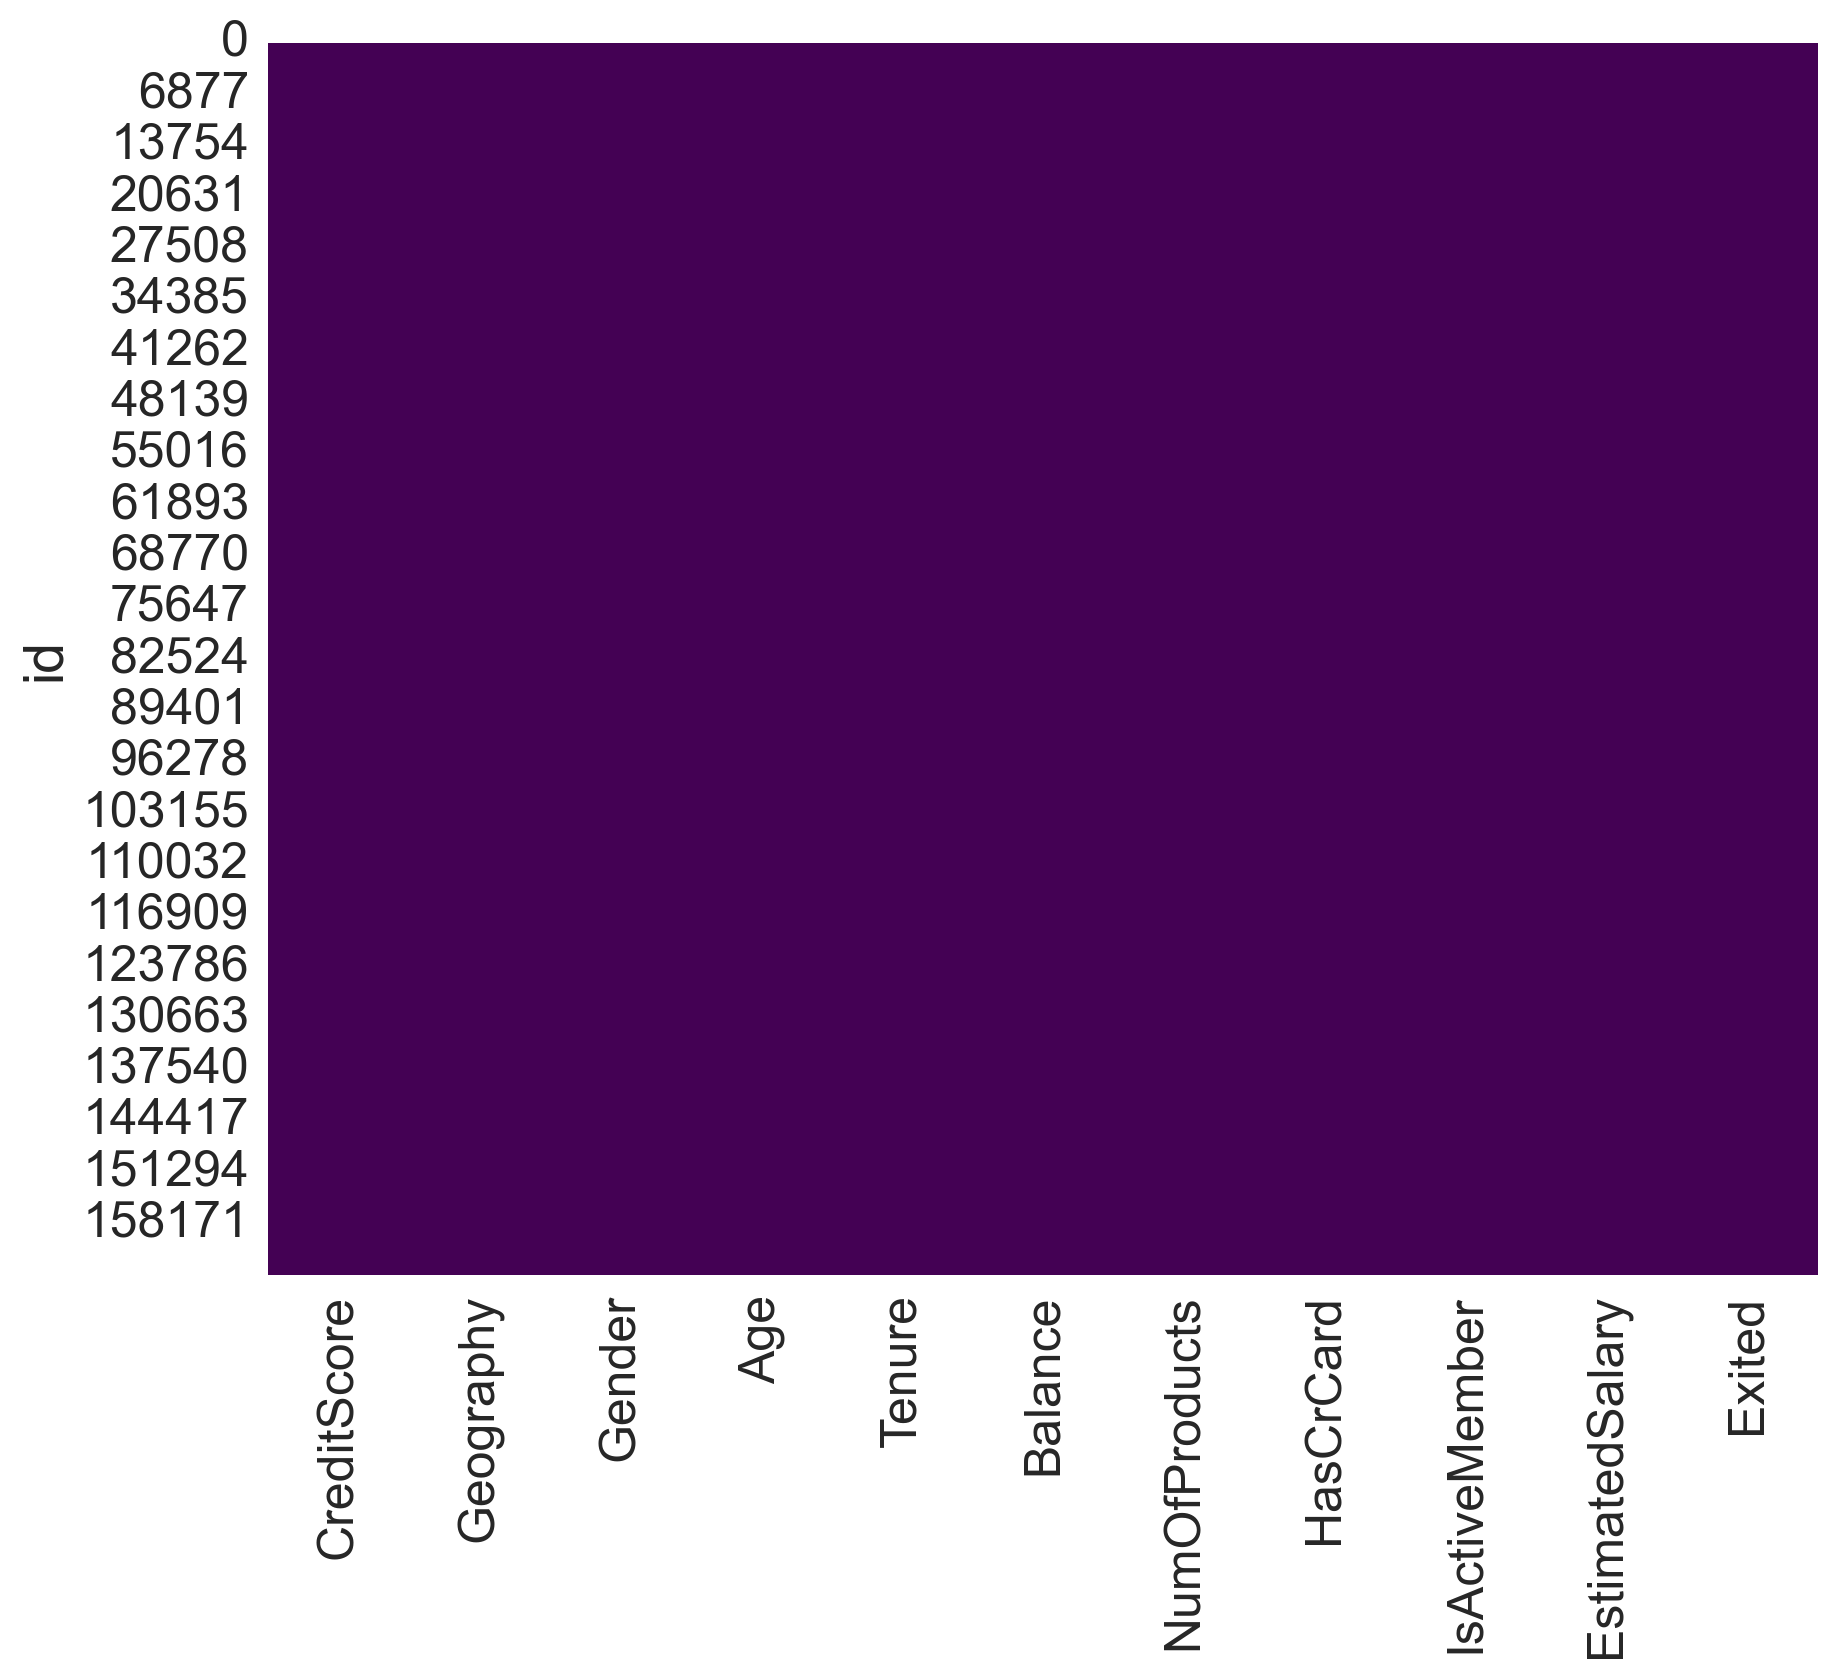

In [15]:
for col in train_df.select_dtypes(include="number"):
    print(f'{col:-<50} {train_df[col].isna().sum()/train_df.shape[0]}') 

# Création de la heatmap des valeurs manquantes
plt.figure(figsize=(10,8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')


Heureusement, il n y'a pas de **valeurs manquantes** dans notre base.  `describe()`nous donne un résumé statistique des variables de notre base

In [16]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
HasCrCard,165034.0,0.753954,0.430707,0.00,1.00,1.0,1.0000,1.00
IsActiveMember,165034.0,0.497770,0.499997,0.00,0.00,0.0,1.0000,1.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48
Exited,165034.0,0.211599,0.408443,0.00,0.00,0.0,0.0000,1.00


Les choses les plus importantes à noter sont :

- L'âge des clients varie de 18 à 92 ans, avec une valeur moyenne approximativement égale à 40 ans,
- L'ancienneté moyenne (et médiane) est de 5 ans, donc la majorité des clients est fidèle (ancienneté > 3), et
- Environ 50 % des clients sont actifs.

EDA nous aidera à mieux comprendre notre ensemble de données. Cependant, avant d'examiner les données plus en détail, nous devons créer un **ensemble de test**, le mettre de côté et l'utiliser uniquement pour évaluer nos modèles de Machine Learning. Cette pratique protège nos modèles du **biais de surveillance des données** () et garantit que l'évaluation sera effectuée à l'aide de données invisibles.

<br>

# Creating a Test Set

We will split our dataset into a train and test set using scikit-learn's `train_test_split()` function, which implements random sampling. Our dataset is large enough (especially relative to the number of features), so we do **not** risk introducing *sampling bias*.

<br>

# Analyse des données exploratoires

## Variable cible : Exited

Comme nous l'avons mentionné précédemment, la variable cible est déjà encodée et peut prendre deux valeurs possibles :

Text(0, 0.5, 'Count')

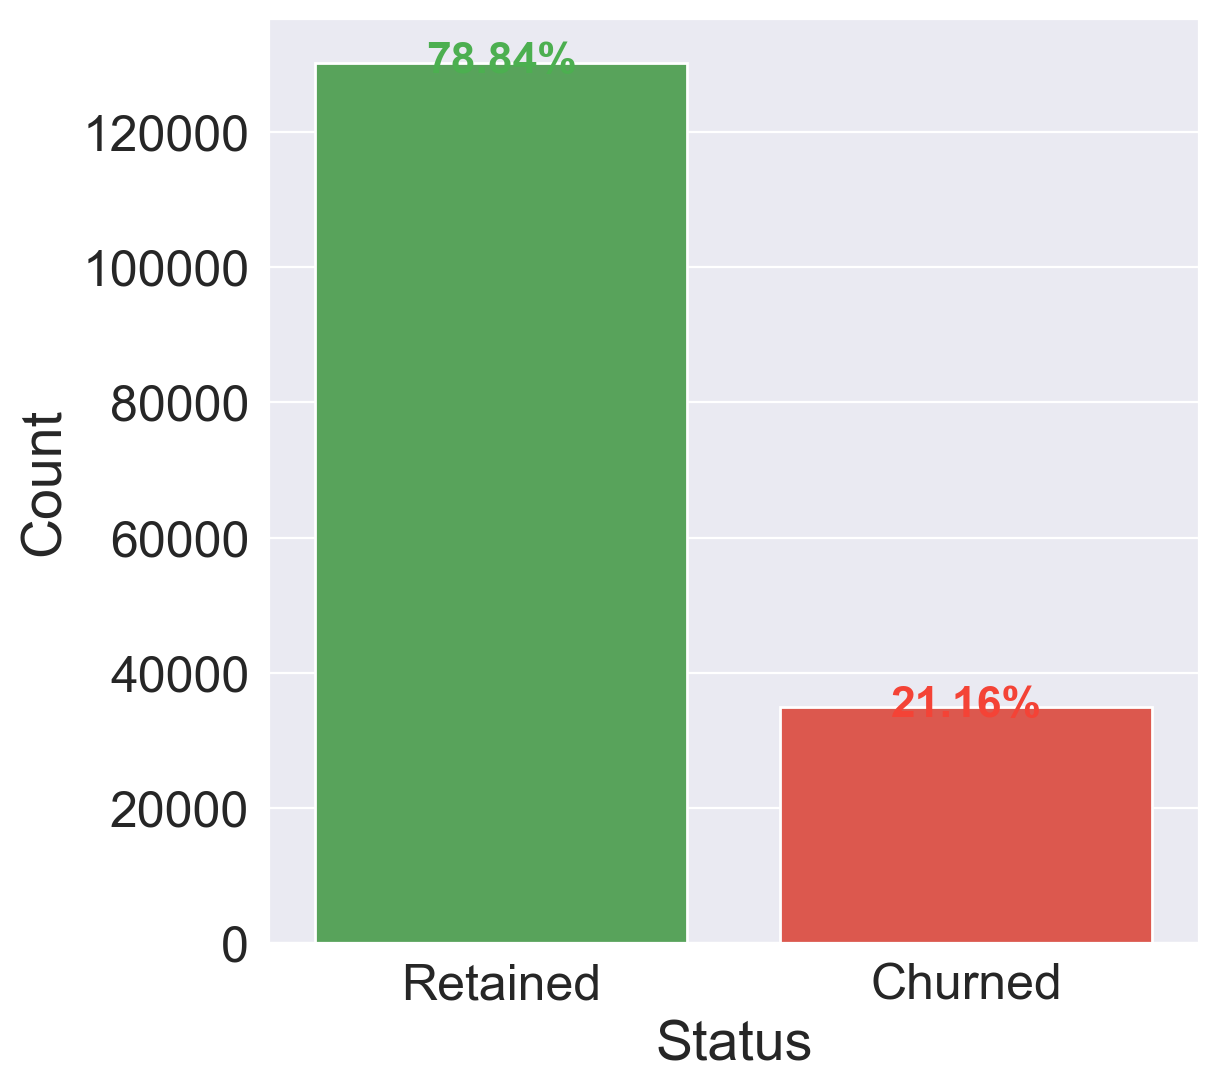

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
font_size = 12  # Adjust this value as needed
# Définir les couleurs
colors = ['#4CAF50', '#F44336']  # Vert pour "Retained", Rouge pour "Churned"

fig, ax = plt.subplots(figsize=(6, 6))

# Utiliser les couleurs pour le graphique
sns.countplot(x='Exited', data=train_df, palette=colors, ax=ax)

for index, value in enumerate(train_df['Exited'].value_counts()):
    label = '{}%'.format(round((value / train_df['Exited'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                color=colors[index],
                fontweight='bold',
                size=font_size + 4)
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
#ax.set_ylim([0, 7000]);

La banque a conservé quasiment 80 % de sa clientèle.

Notez que notre ensemble de données est **asymétrique/déséquilibré** puisque le nombre d'instances dans la classe « Retained » dépasse de beaucoup le nombre d'instances dans la classe « Churned ». Par conséquent, la précision n’est probablement pas la meilleure mesure des performances du modèle.


Différentes techniques de visualisation s'appliquent à différents types de variables. Il est donc utile de faire la différence entre les variables continues et catégorielles et de les examiner séparément.

In [1]:
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure','NumOfProducts']
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  Age, CreditScore, Balance, EstimatedSalary, Tenure, NumOfProducts
Categorical:  Geography, Gender, HasCrCard, IsActiveMember


## Variables quantitatives

En appelant la méthode `hist()`, nous pouvons tracer un histogramme pour chacune des quatre caractéristiques numériques continues ::

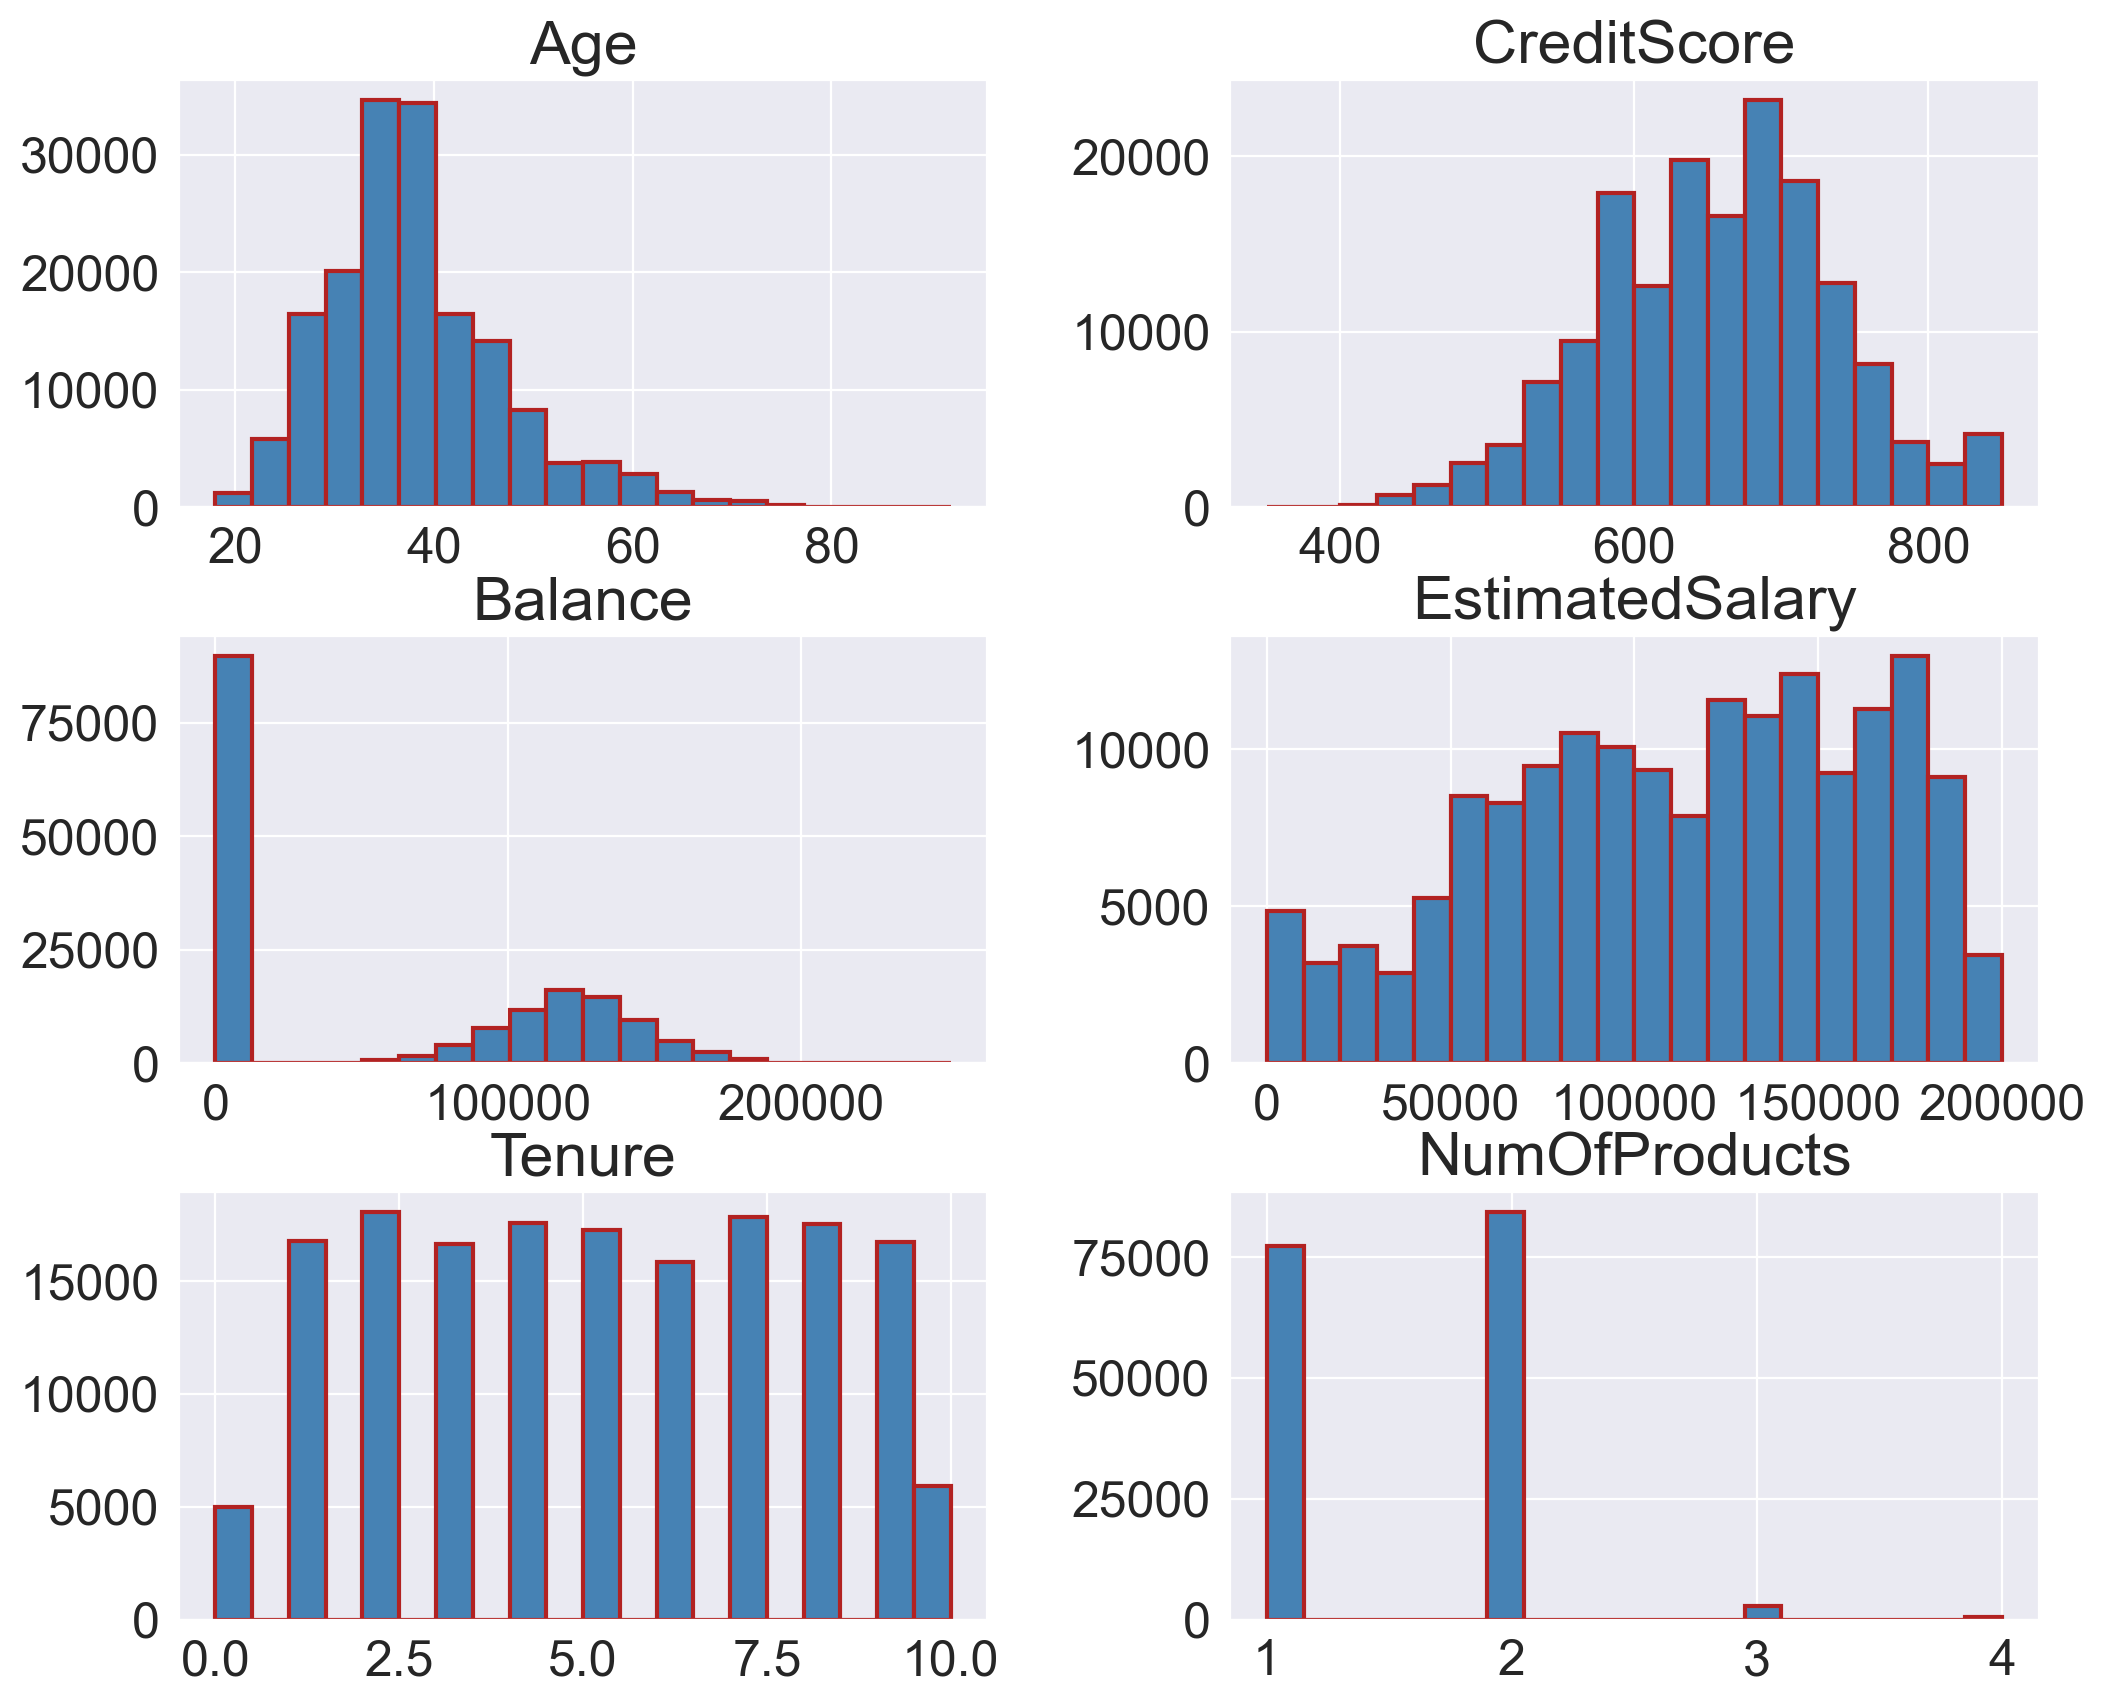

In [20]:
train_df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(3, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

- 'Age' est légèrement en queue, c'est à dire qu'il s'étend plus à droite de la médiane qu'à gauche,
- La plupart des valeurs de « CreditScore » sont supérieures à 600,
- Si on ignore le premier bin, 'Balance' suit une distribution assez normale, et
- La répartition du « EstimatedSalary » est plus ou moins uniforme et fournit peu d'informatio
- La moitié des clients a un solde nul, ce qui attire assez notre attention.ns.

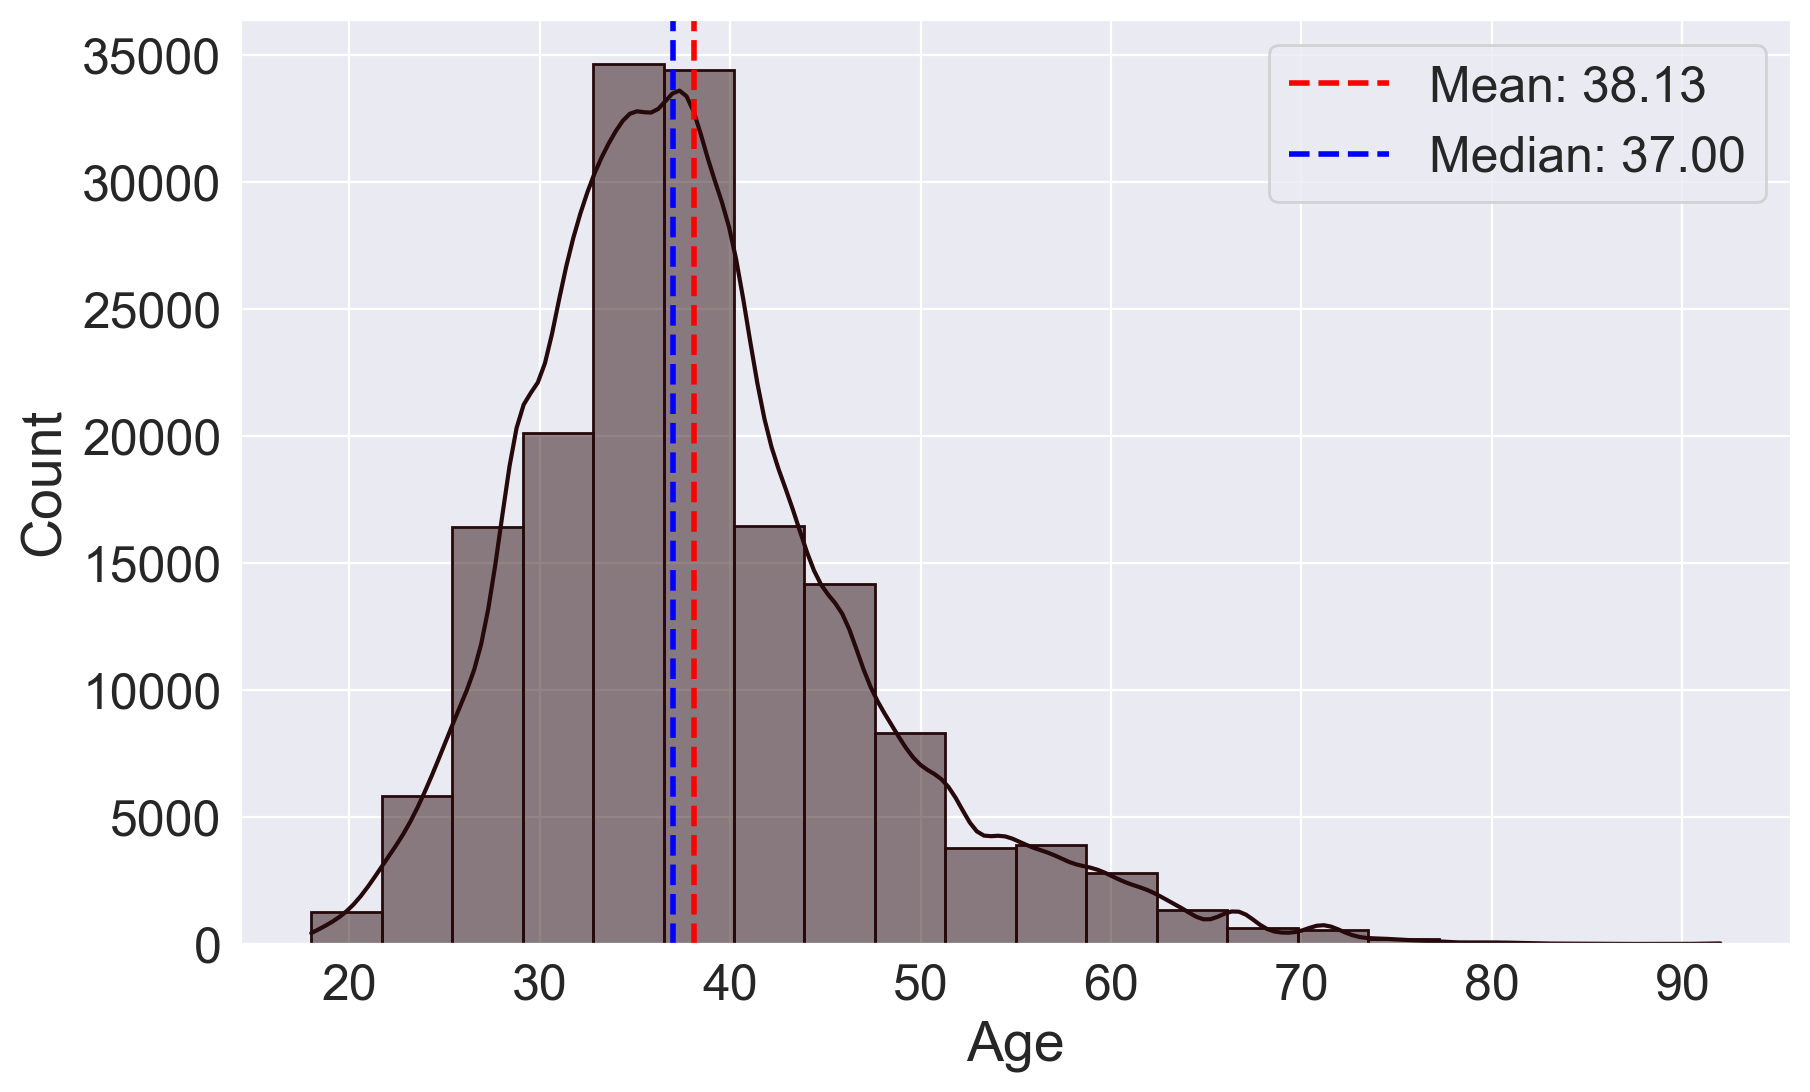

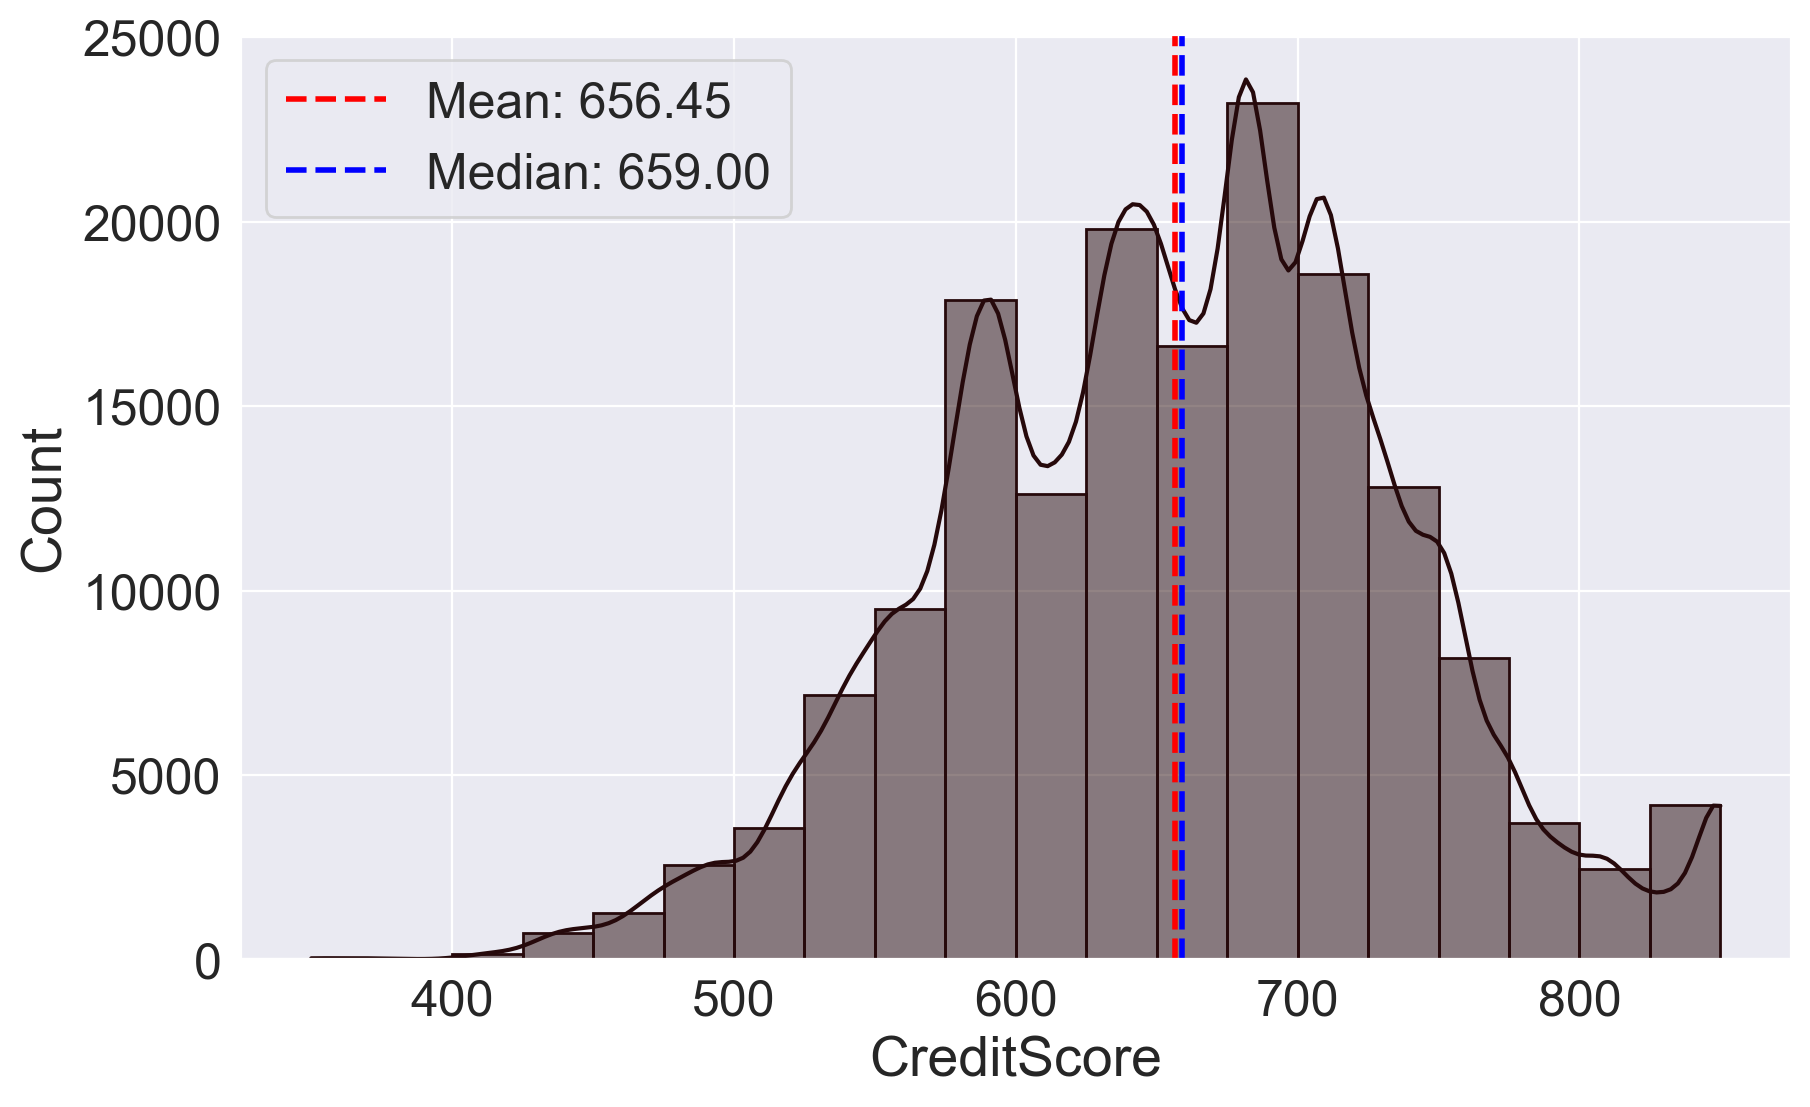

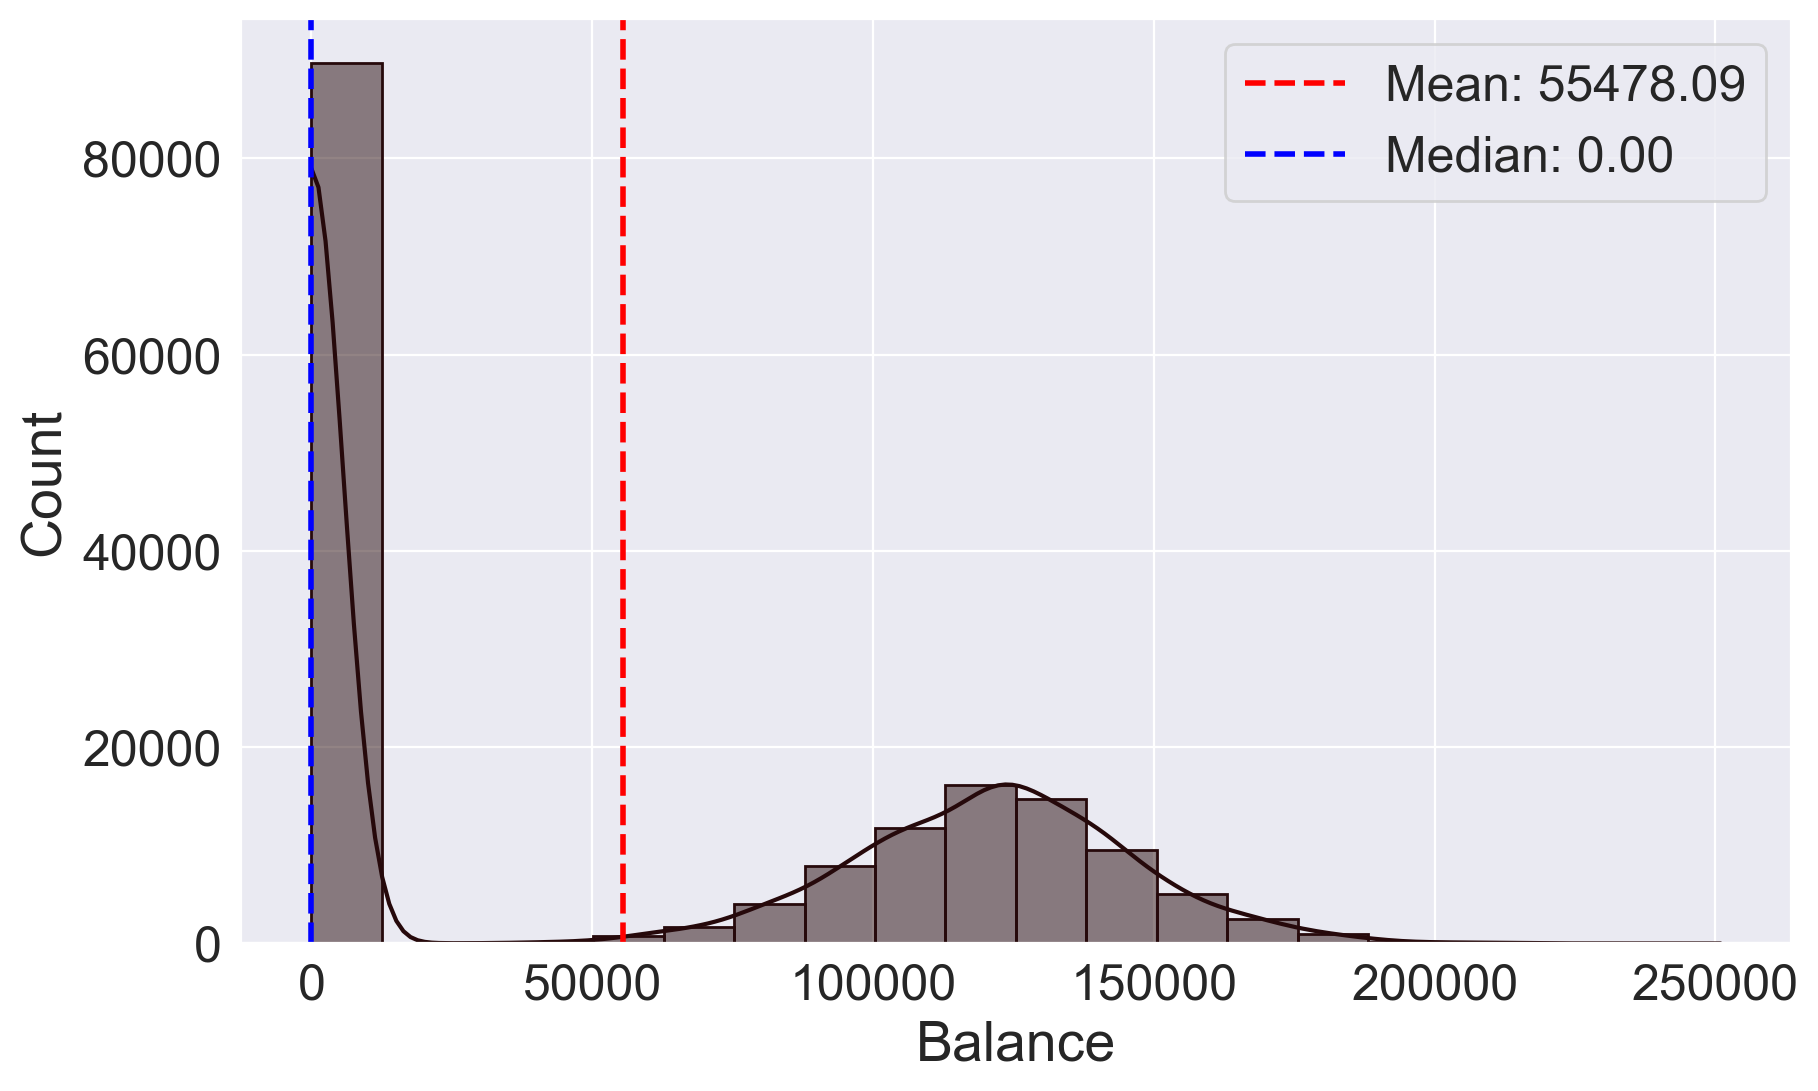

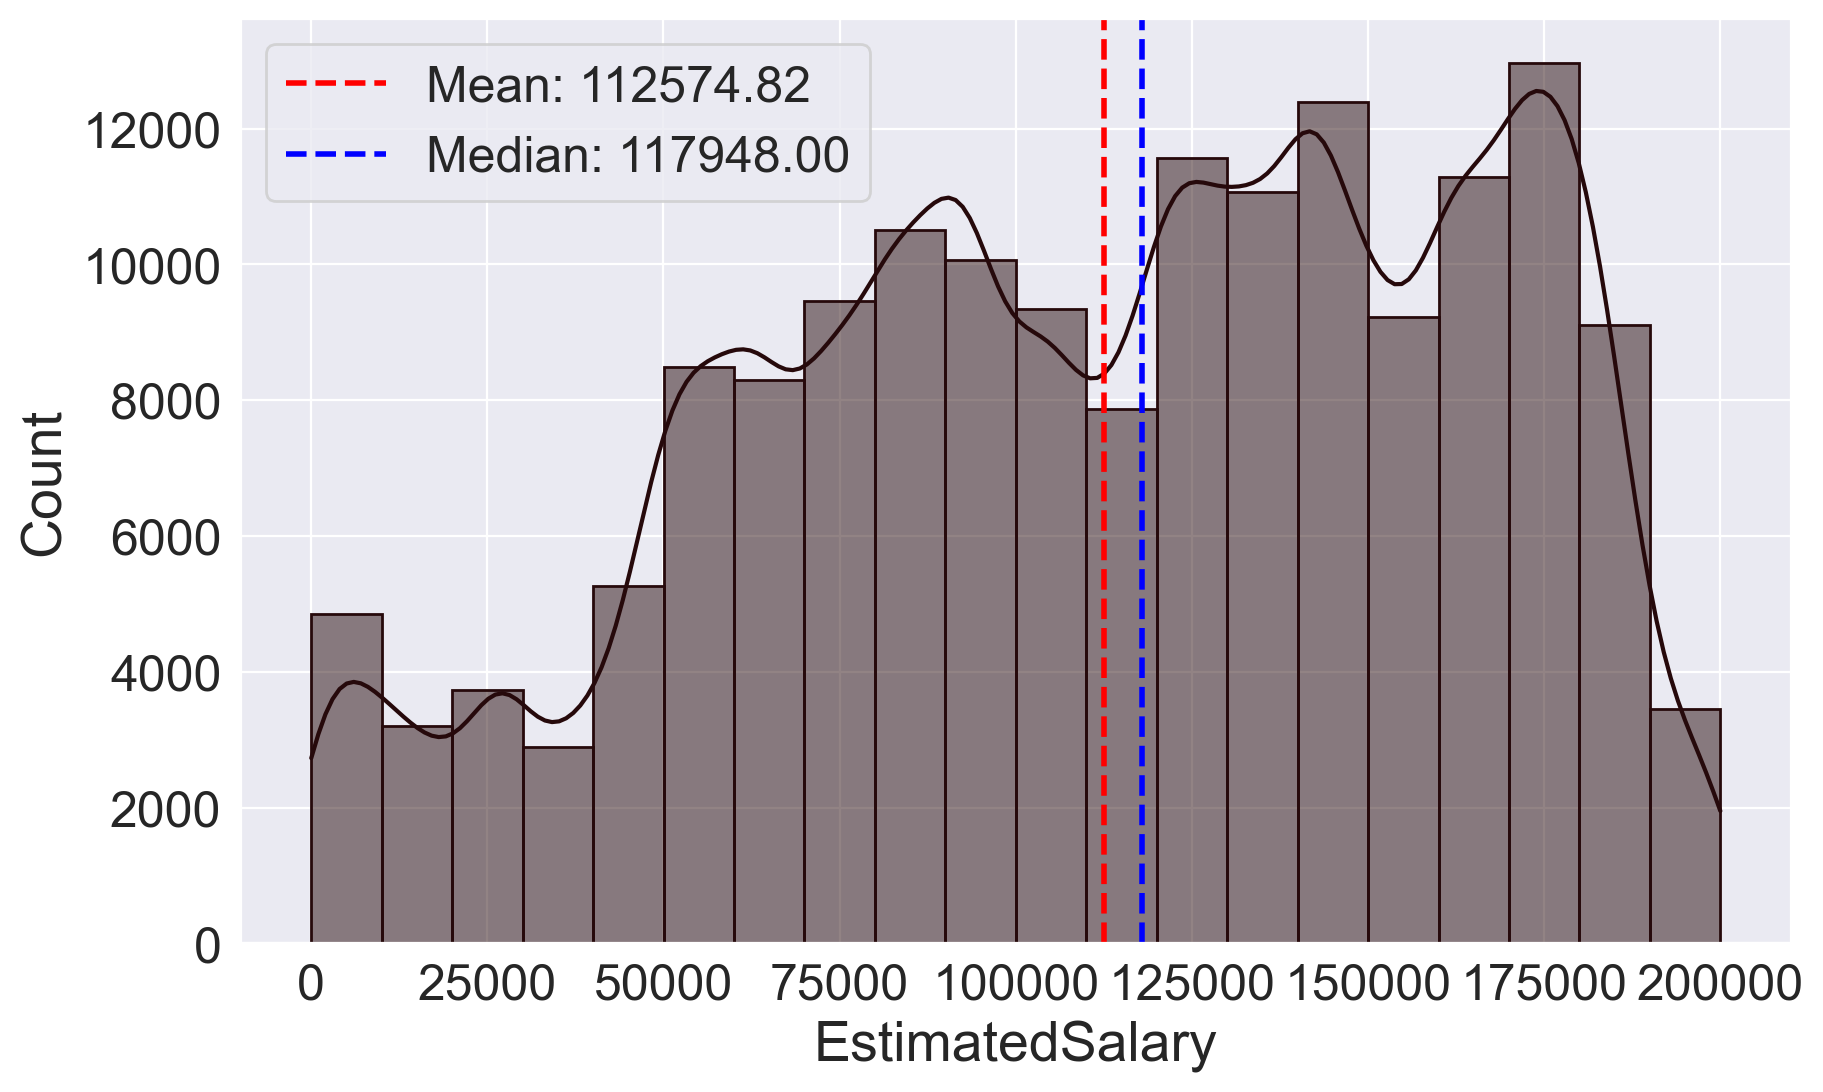

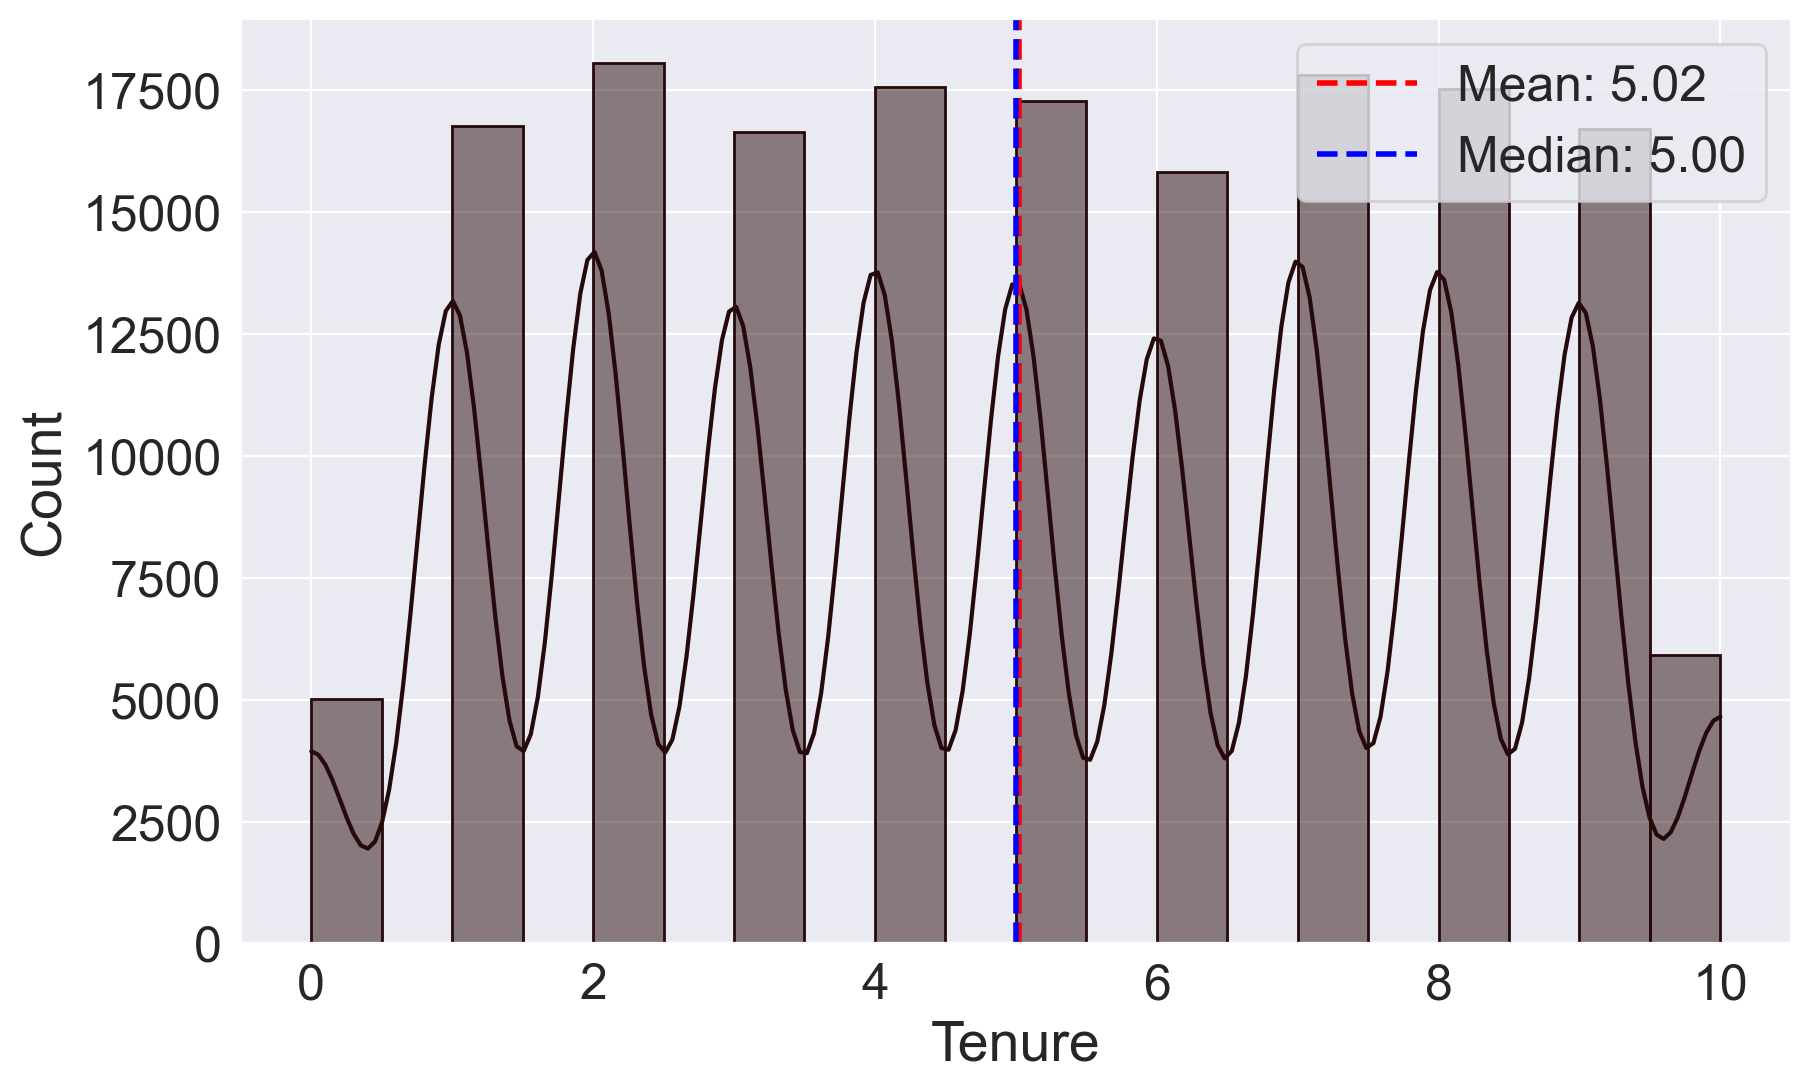

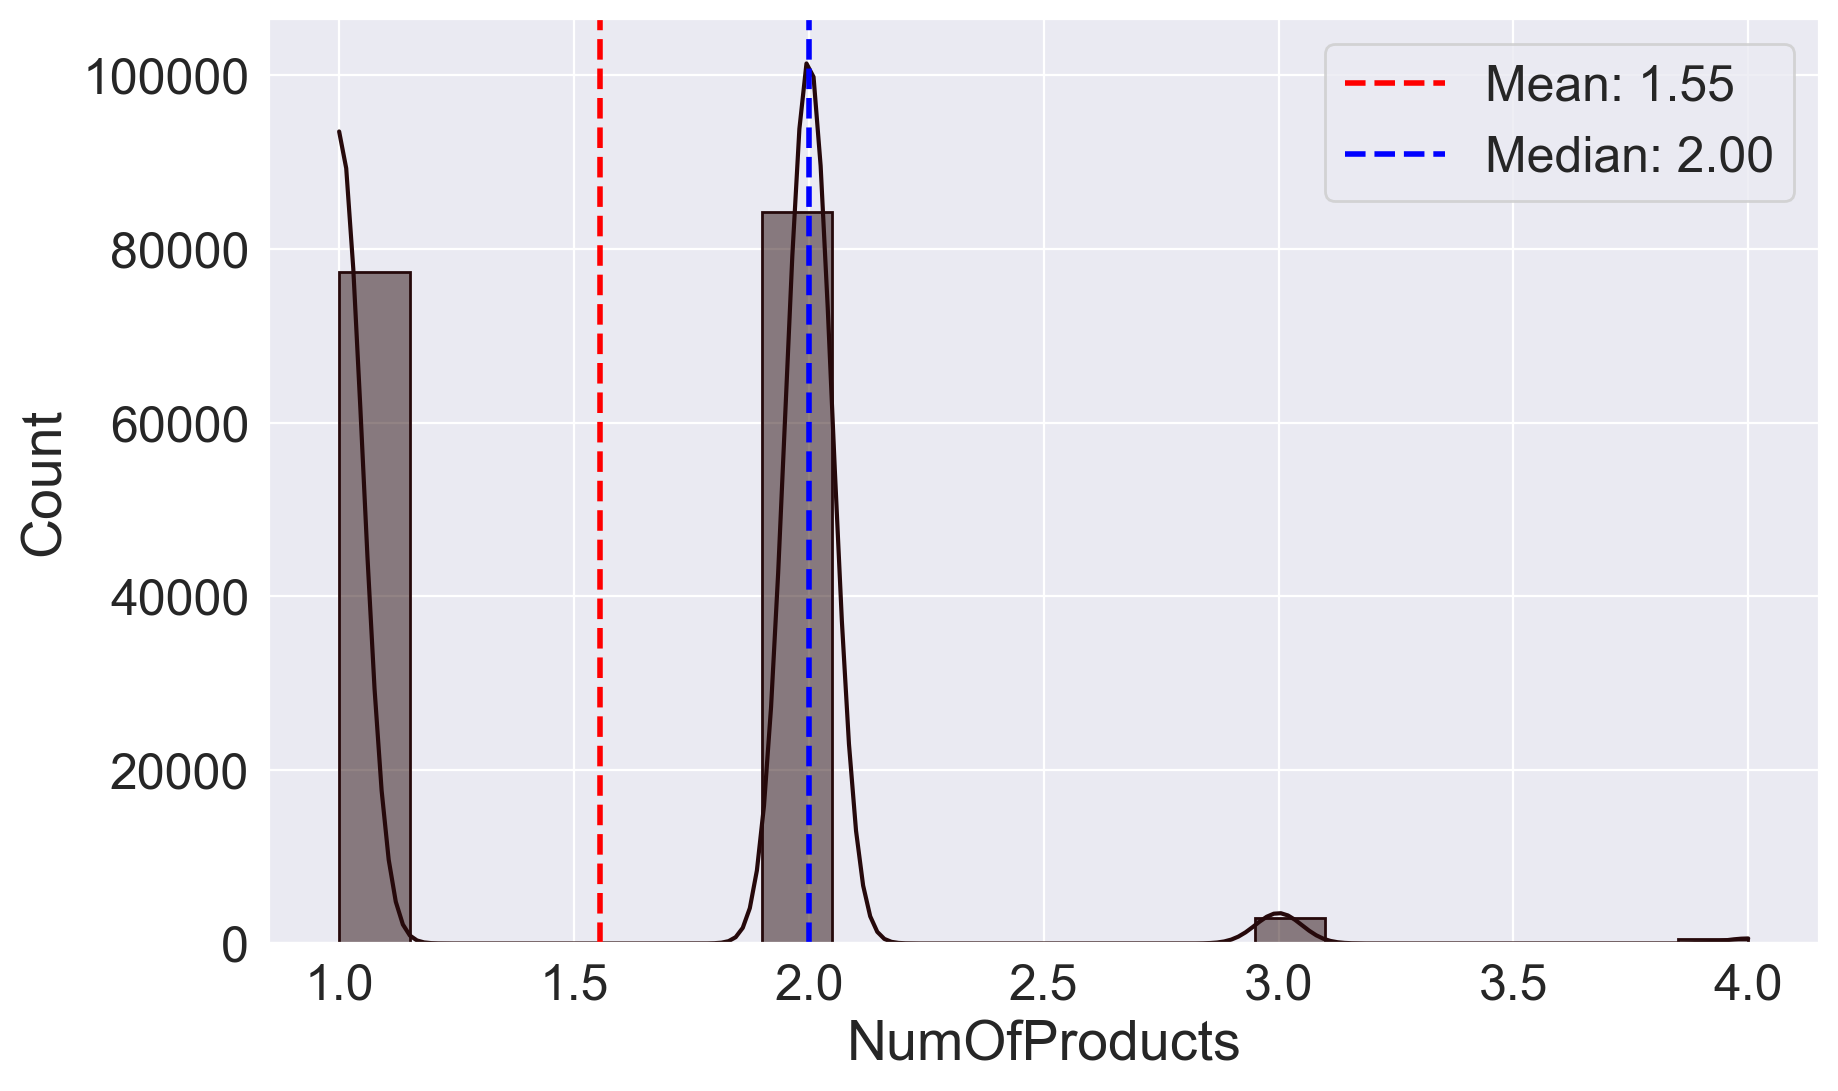

In [21]:
for var in continuous :
    hist_continuous(var)

## Looking for Correlations

Nous pouvons calculer le coefficient de corrélation standard entre chaque paire de caractéristiques (quantitatives) en utilisant la méthode `corr()` des pandas et le tracer sous forme de matrice :

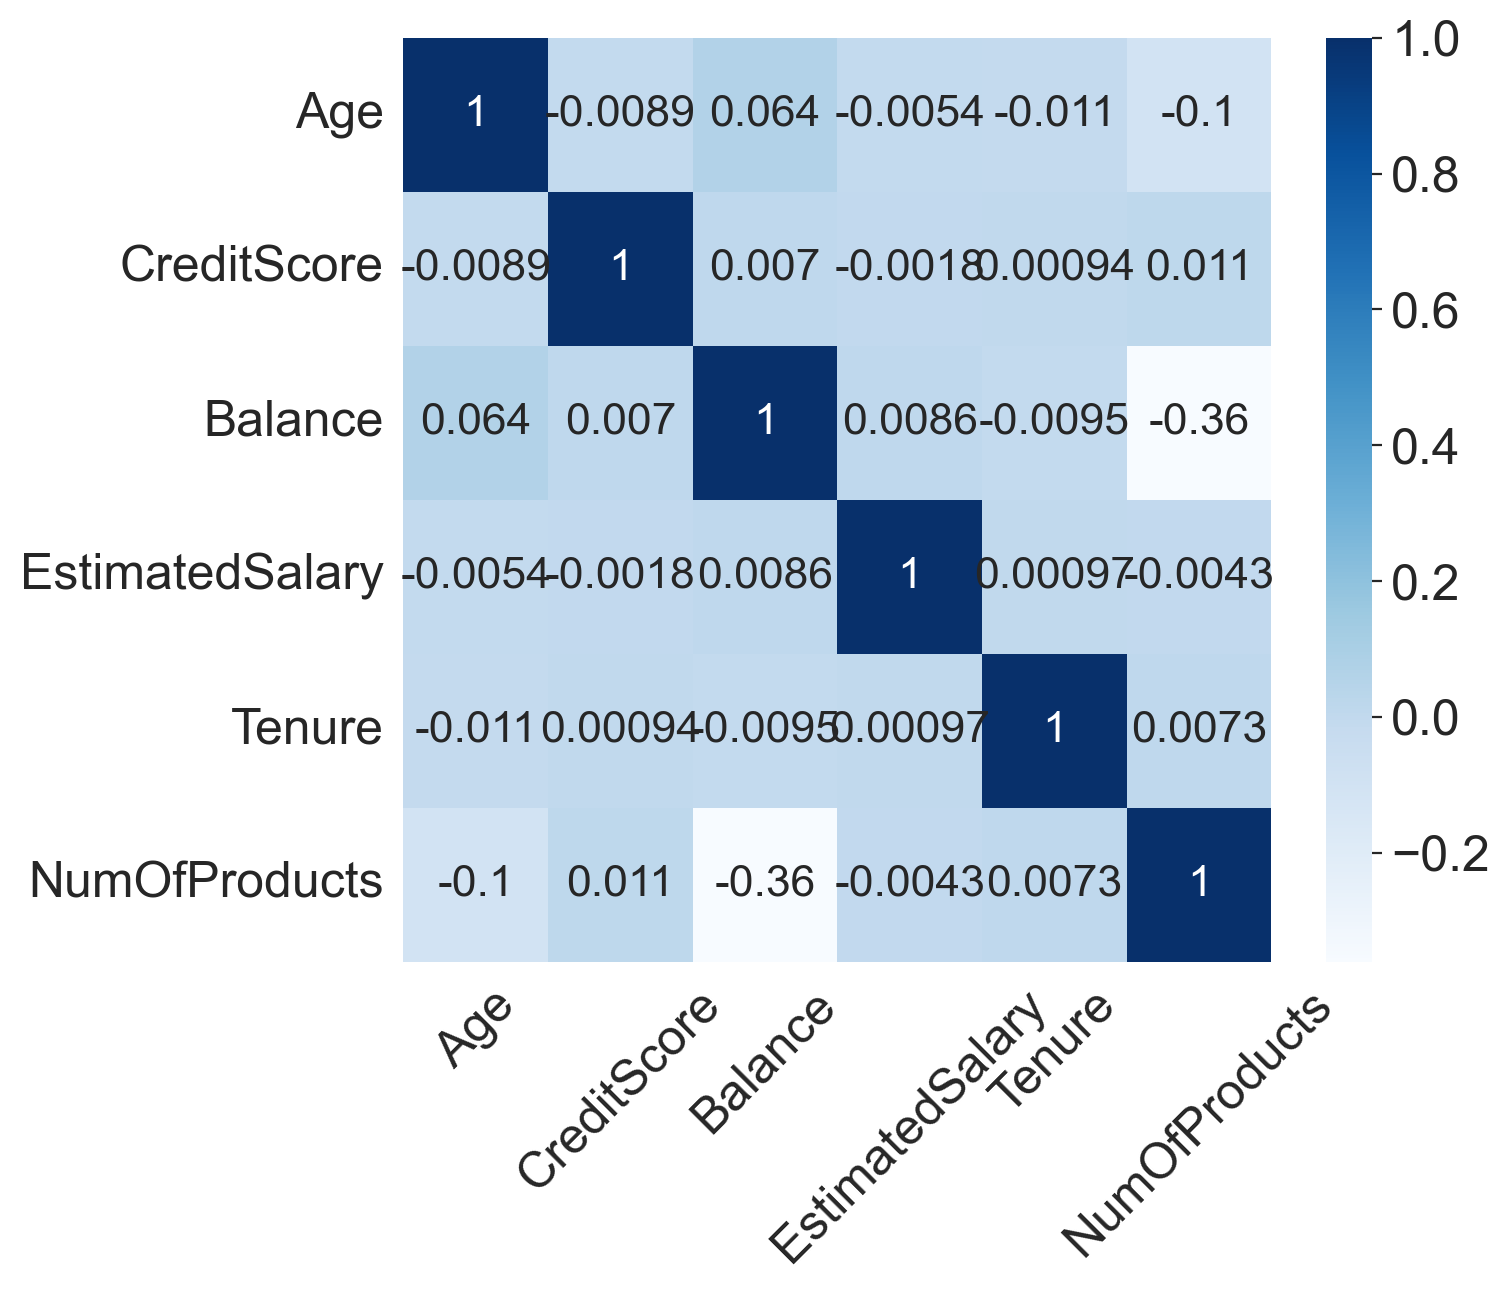

In [22]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(train_df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Blues',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

Il n'y a pas d'intercorrélation significative entre nos caractéristiques, nous n'avons donc **pas** à nous soucier de la multicolinéarité.

Examinons ces fonctionnalités plus en détail.
### Age

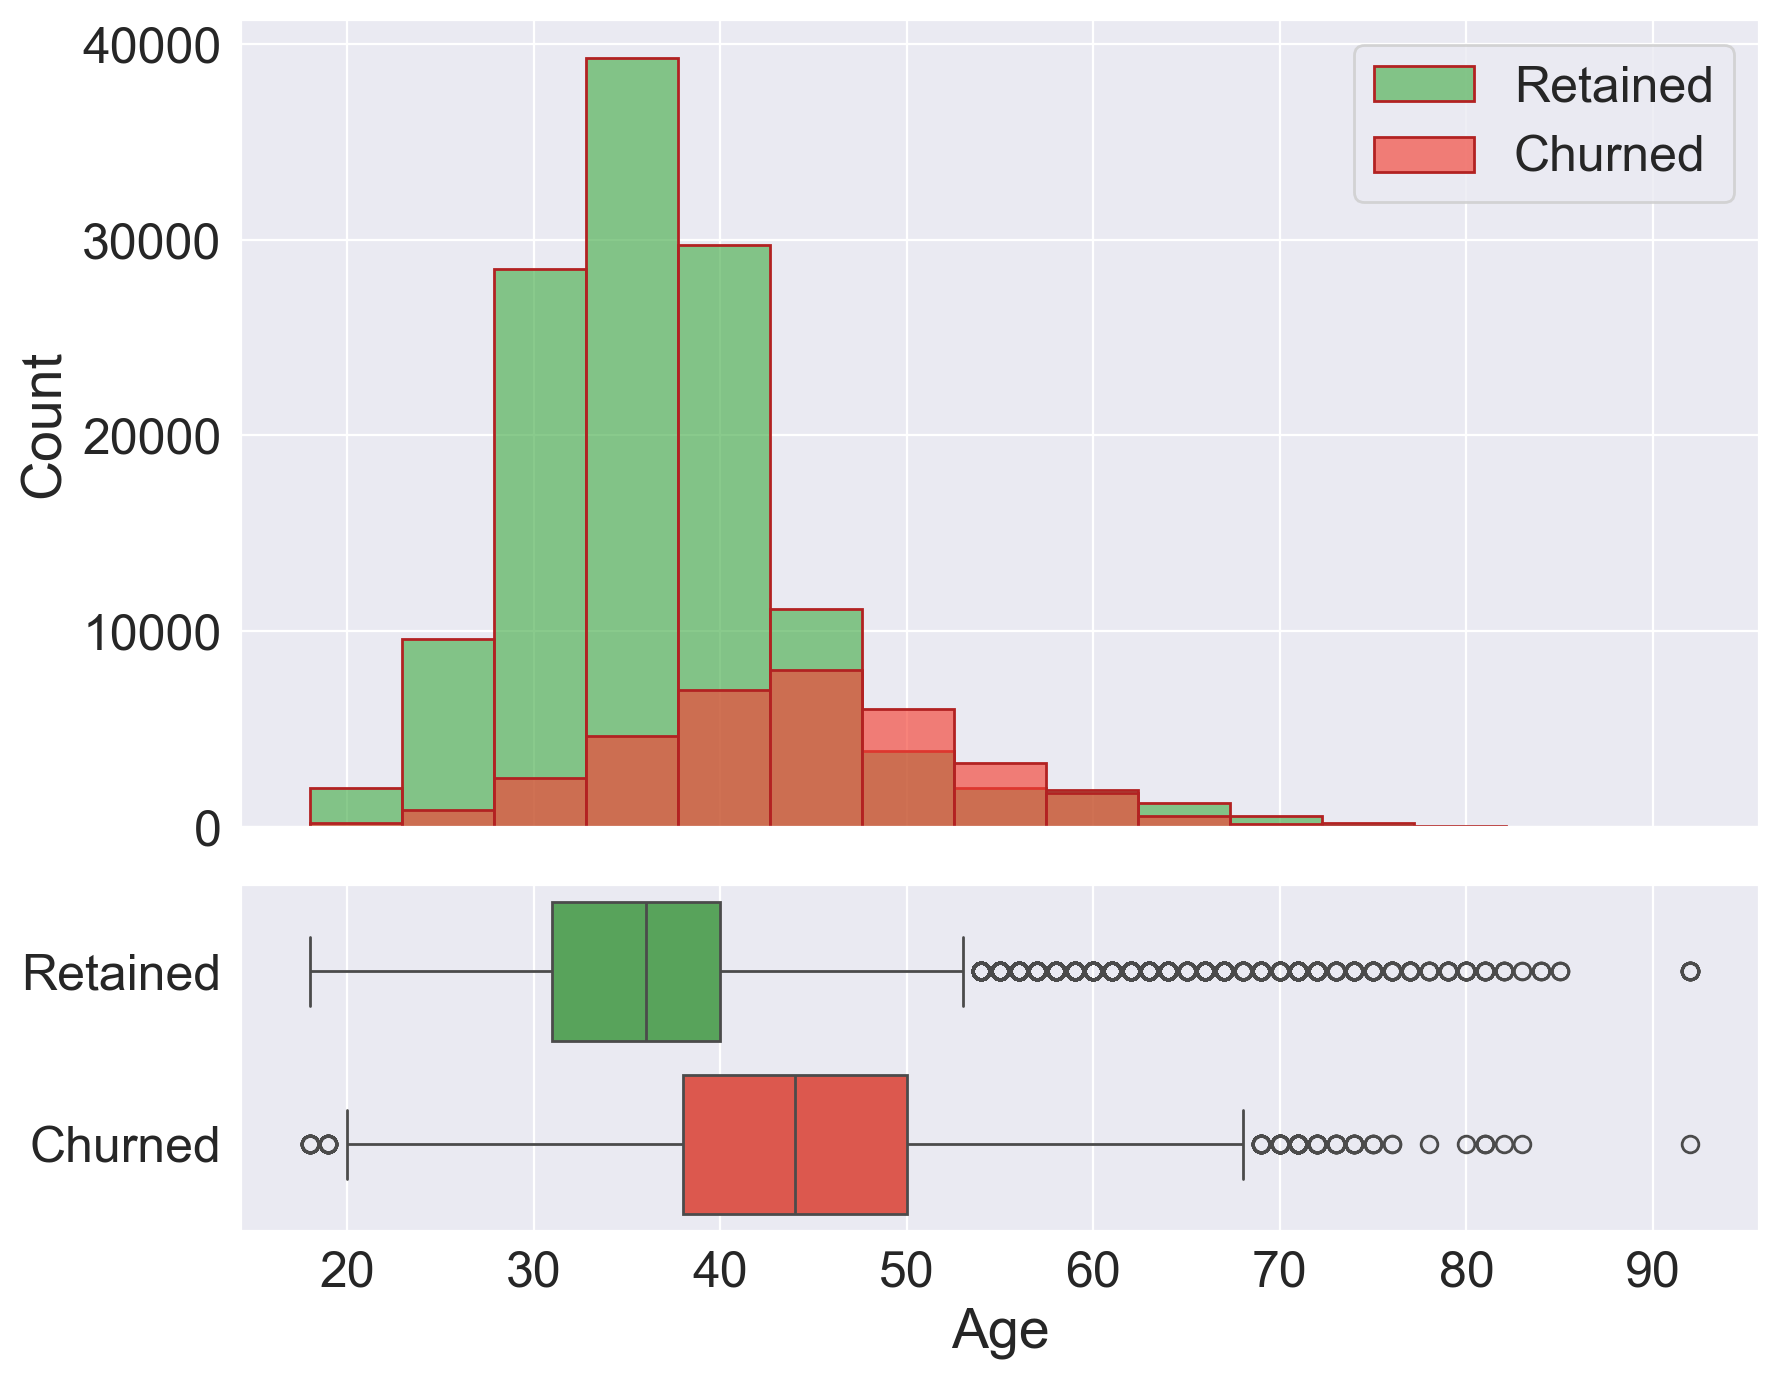

In [23]:
df_churned = train_df[train_df['Exited'] == 1]
df_retained = train_df[train_df['Exited'] == 0]

plot_continuous('Age')

Il est intéressant de noter qu’il existe une nette différence entre les groupes d’âge, car les clients plus âgés sont plus susceptibles de se désinscrire. Cette observation pourrait potentiellement indiquer que les préférences changent avec l'âge et que la banque n'a pas adapté sa stratégie pour répondre aux exigences des clients plus âgés.


### Credit Score

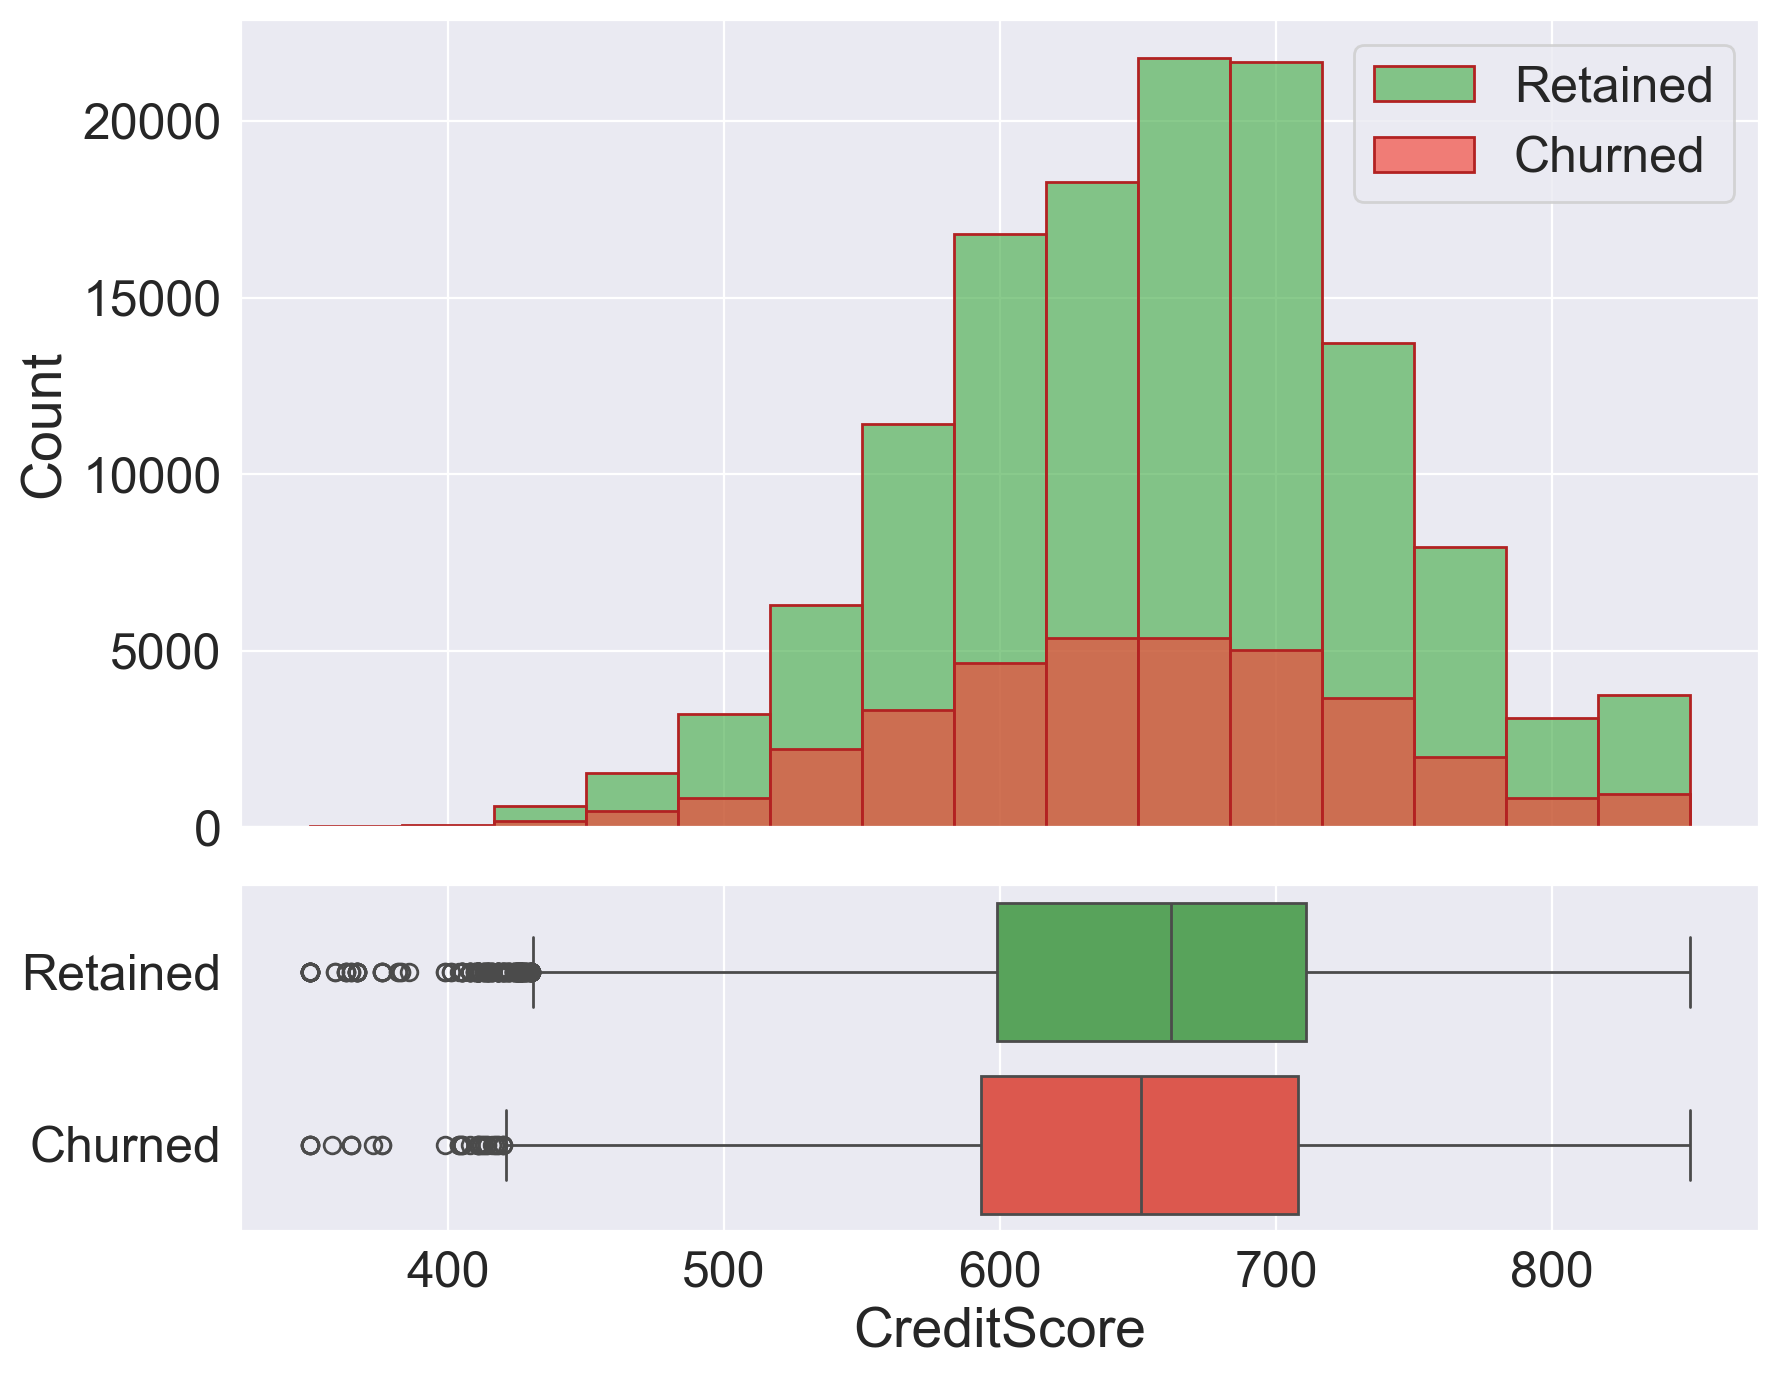

In [24]:
plot_continuous('CreditScore')

Il n’y a pas de différence significative entre les clients retenus et les clients abandonnés en termes de cotes de crédit.

### Balance

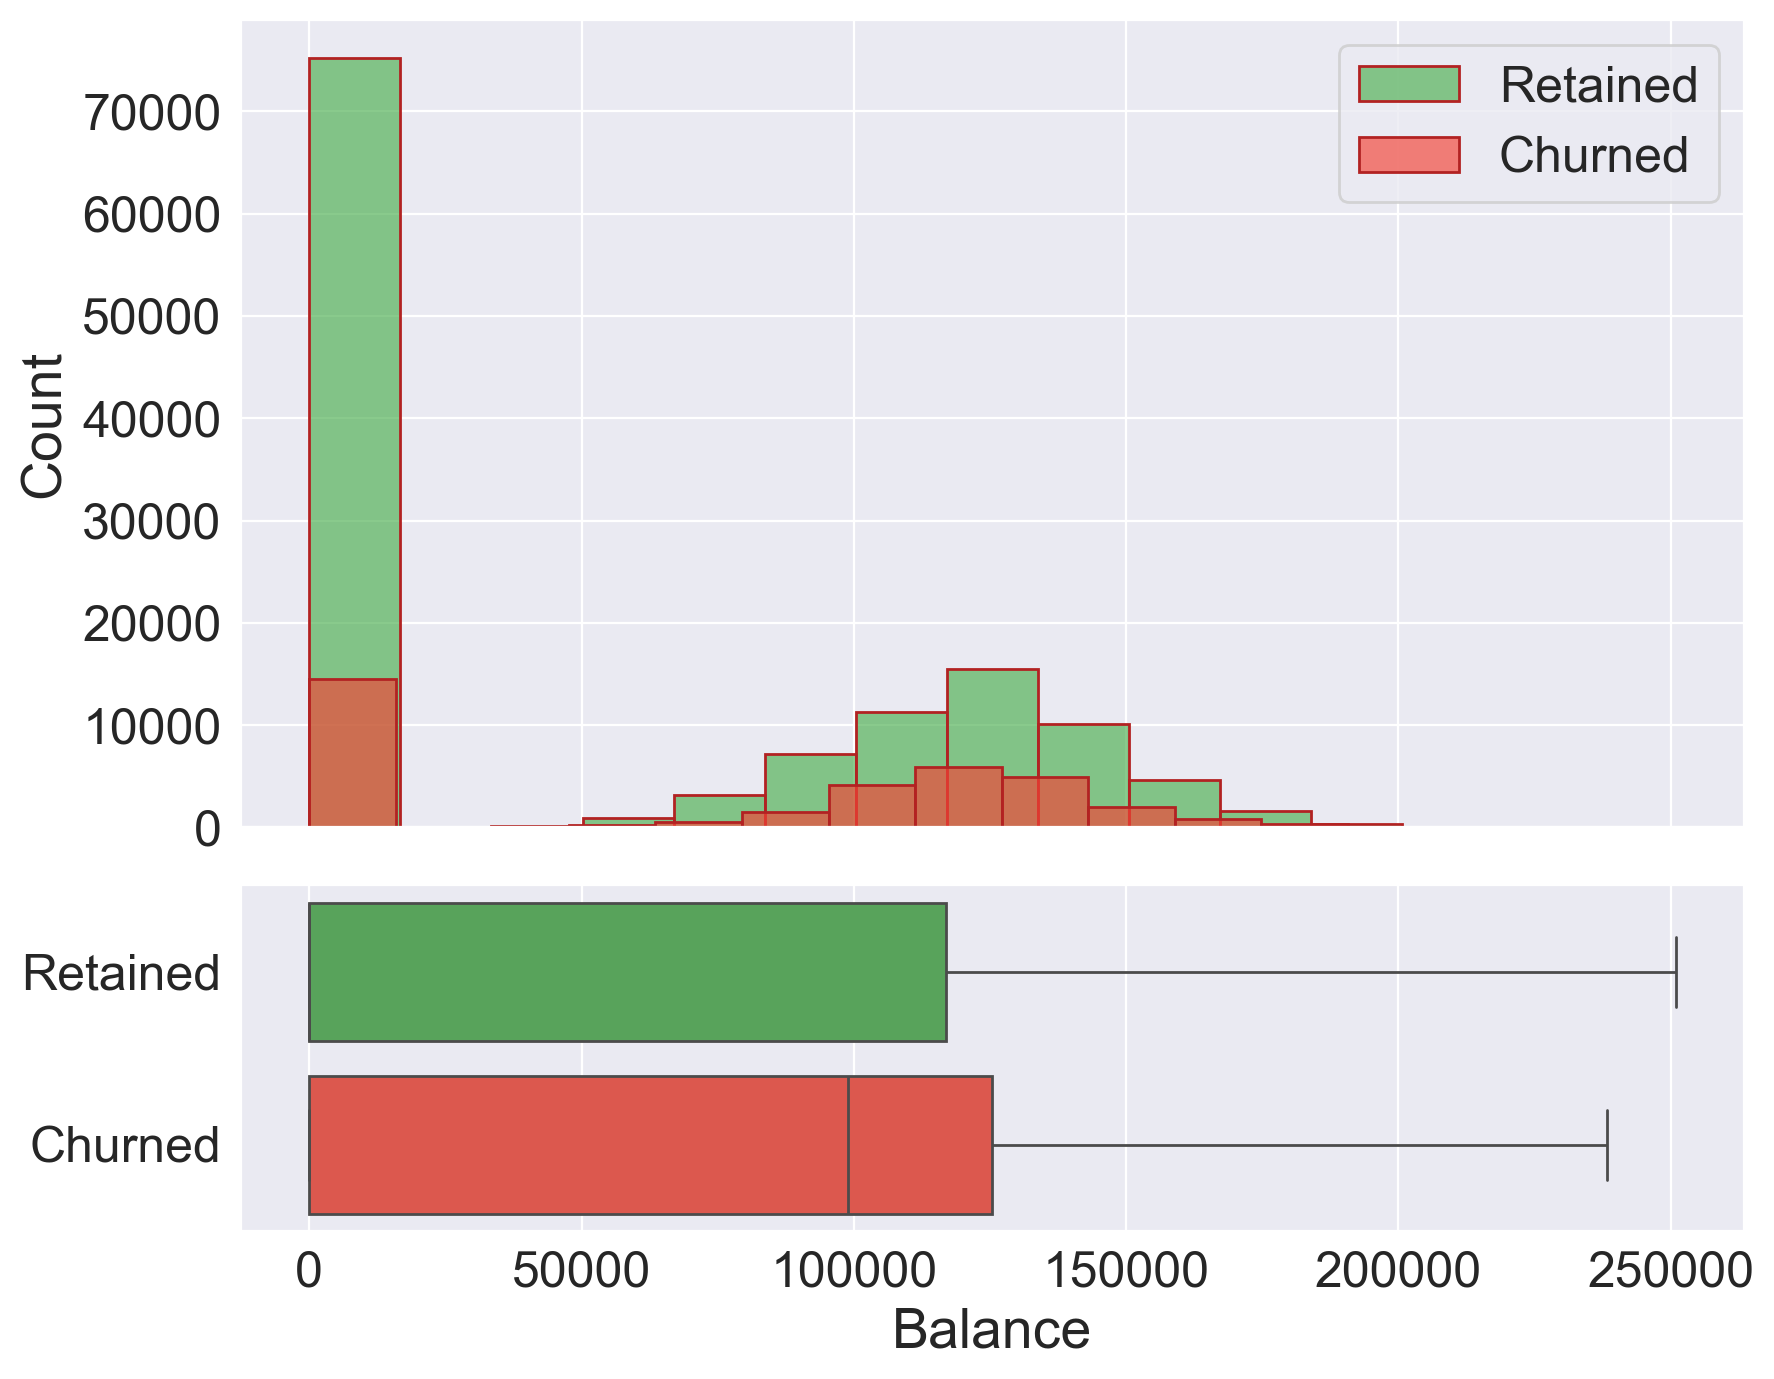

In [25]:
plot_continuous('Balance')

Encore une fois, les deux distributions sont assez similaires. Il existe un pourcentage important de clients non désabonnés avec un solde de compte faible.

### Estimated Salary

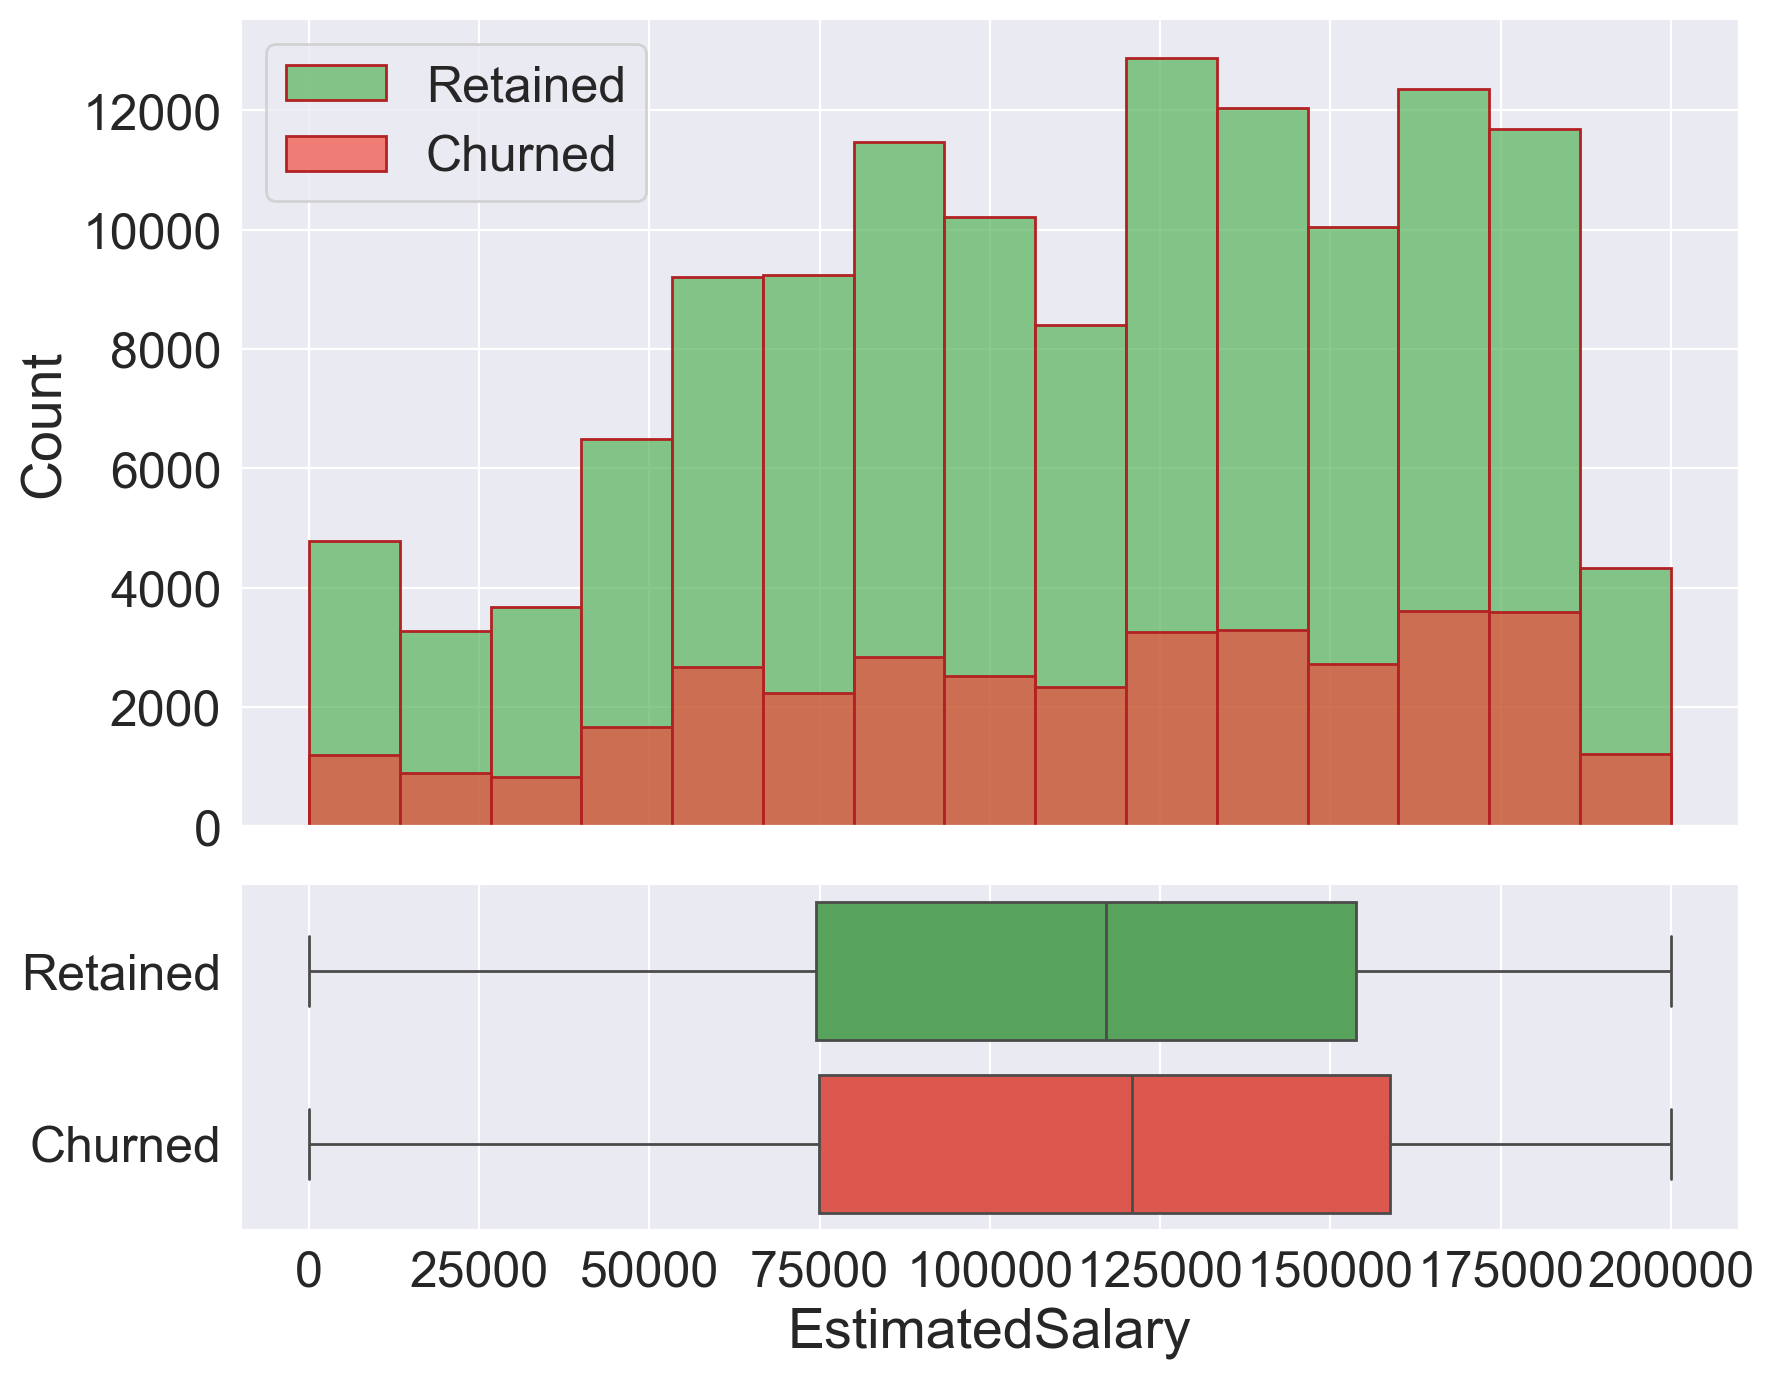

In [26]:
plot_continuous('EstimatedSalary')

Les clients désabonnés et retenus affichent une répartition uniforme similaire de leurs salaires. Par conséquent, nous pouvons conclure que le salaire n’a pas d’effet significatif sur la probabilité de désabonnement.

## Variables catégorielles

Traçons un seaborn.countplot pour chaque caractéristique catégorielle :

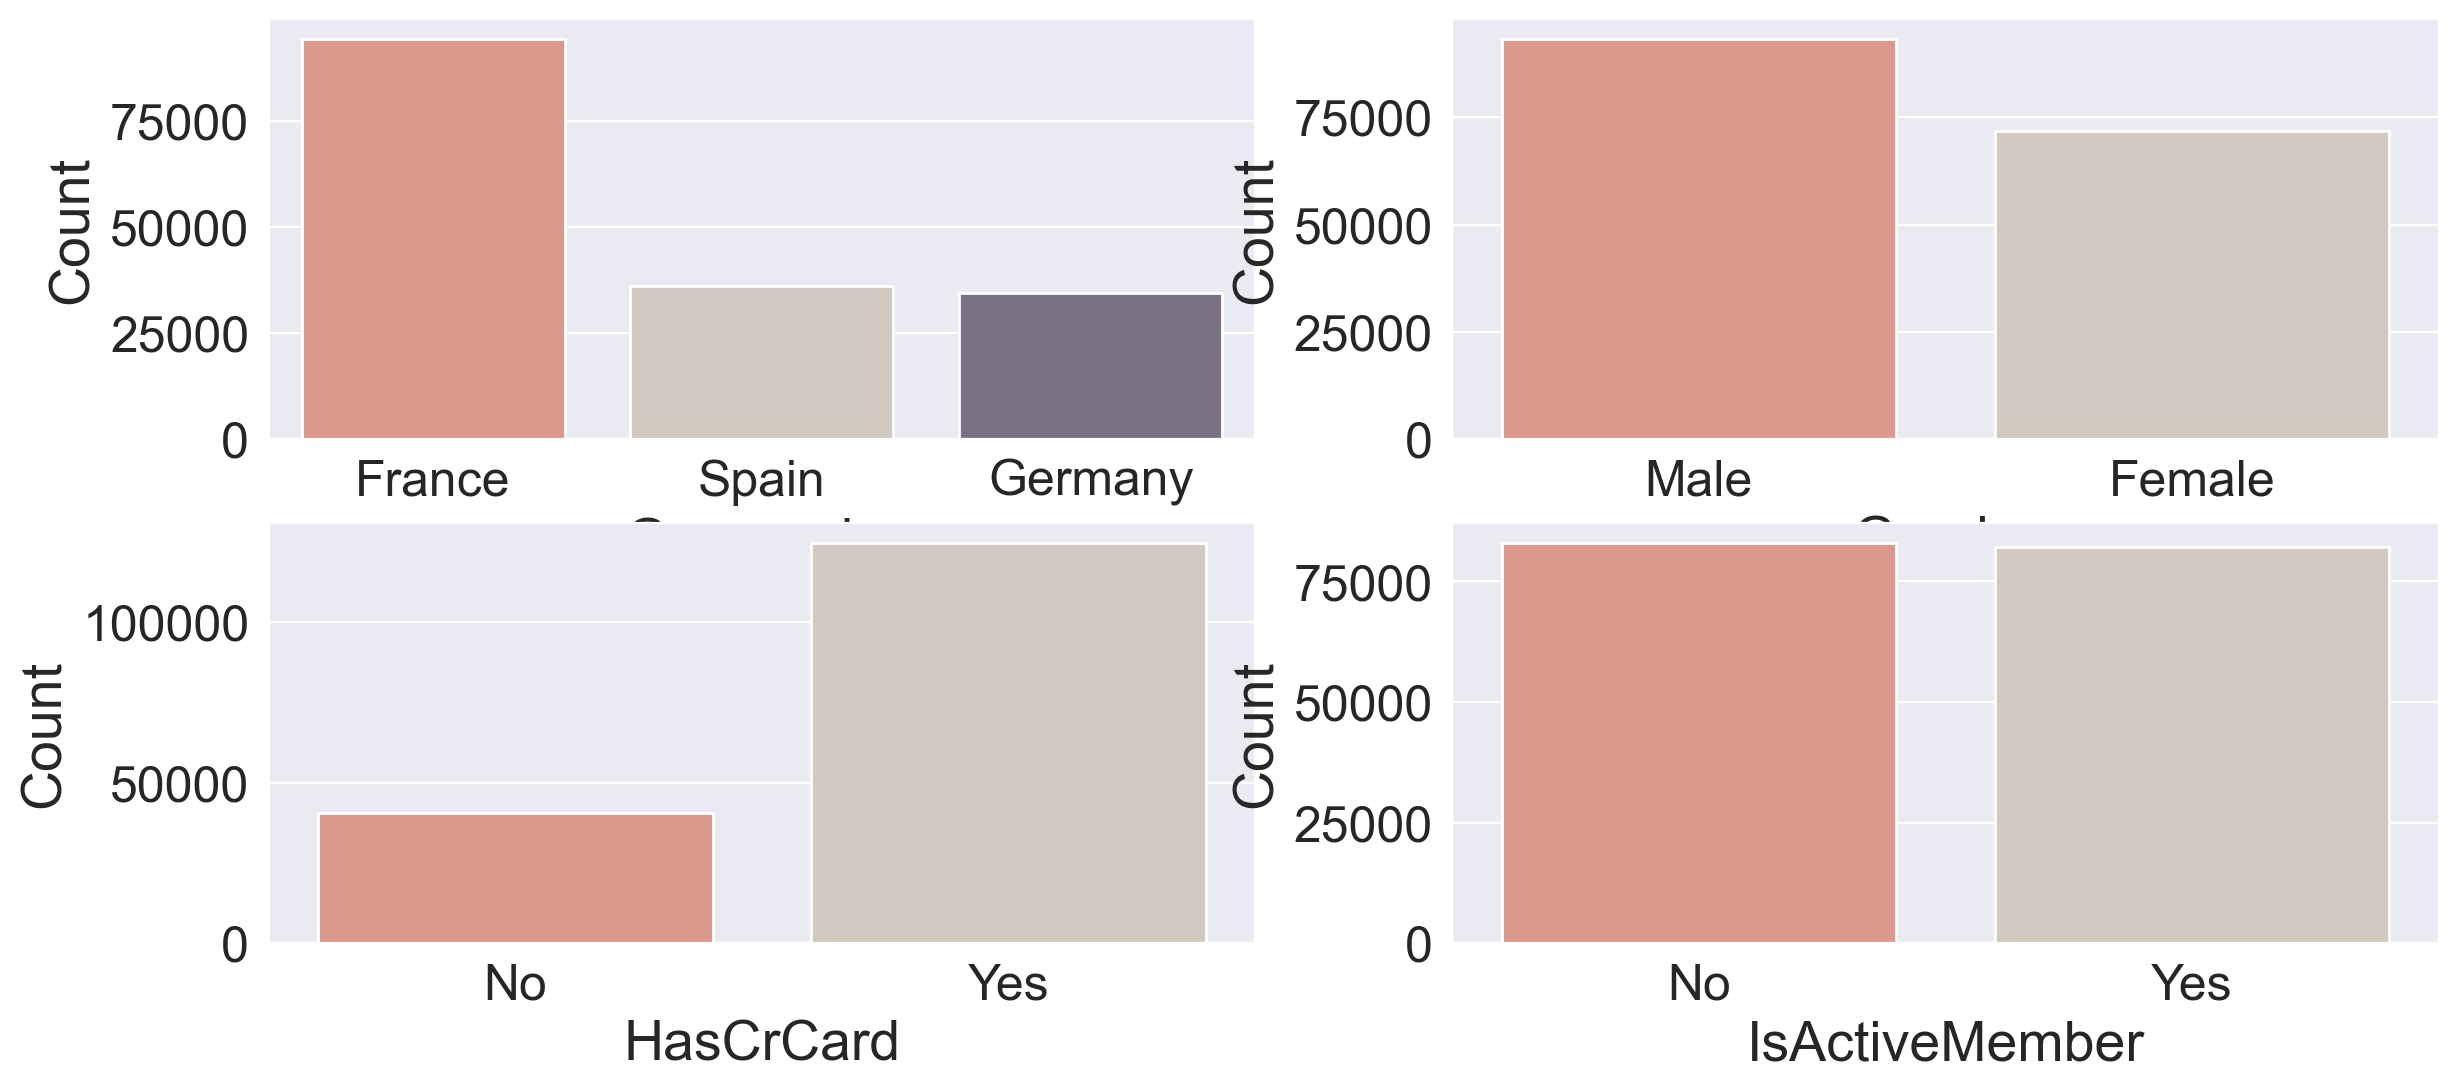

In [27]:
df_cat = train_df[categorical]

fig, ax = plt.subplots(2, 2, figsize=(14, 6))

for index, column in enumerate(df_cat.columns):
    plt.subplot(2, 2, index + 1)
    
    unique_vals = df_cat[column].nunique()
    
    palette = sns.color_palette(colors_cat[:unique_vals])
    
    sns.countplot(x=column, data=train_df, palette=palette)
    
    plt.ylabel('Count')
    if column in ['HasCrCard', 'IsActiveMember']:
        plt.xticks([0, 1], ['No', 'Yes'])

#plt.tight_layout()
plt.show()

# Commentaires :

- La banque a une clientèle dans trois pays (France, Espagne et Allemagne). La plupart des clients se trouvent en France.
- Il y a plus d'hommes que de femmes parmi les clients,
- Seul un faible pourcentage quitte la banque au cours de la première année. Le nombre de clients au cours des dix années entre 1 et 9 est presque le même,
- La plupart des clients ont acheté 1 ou 2 produits, tandis qu'une petite partie en a acheté 3 ou 4,
- Une majorité significative de clients possède une carte de crédit, et
- Près de 50 % des clients ne sont pas actifs.

Nous examinerons à nouveau ces caractéristiques plus en détail.


### Geography

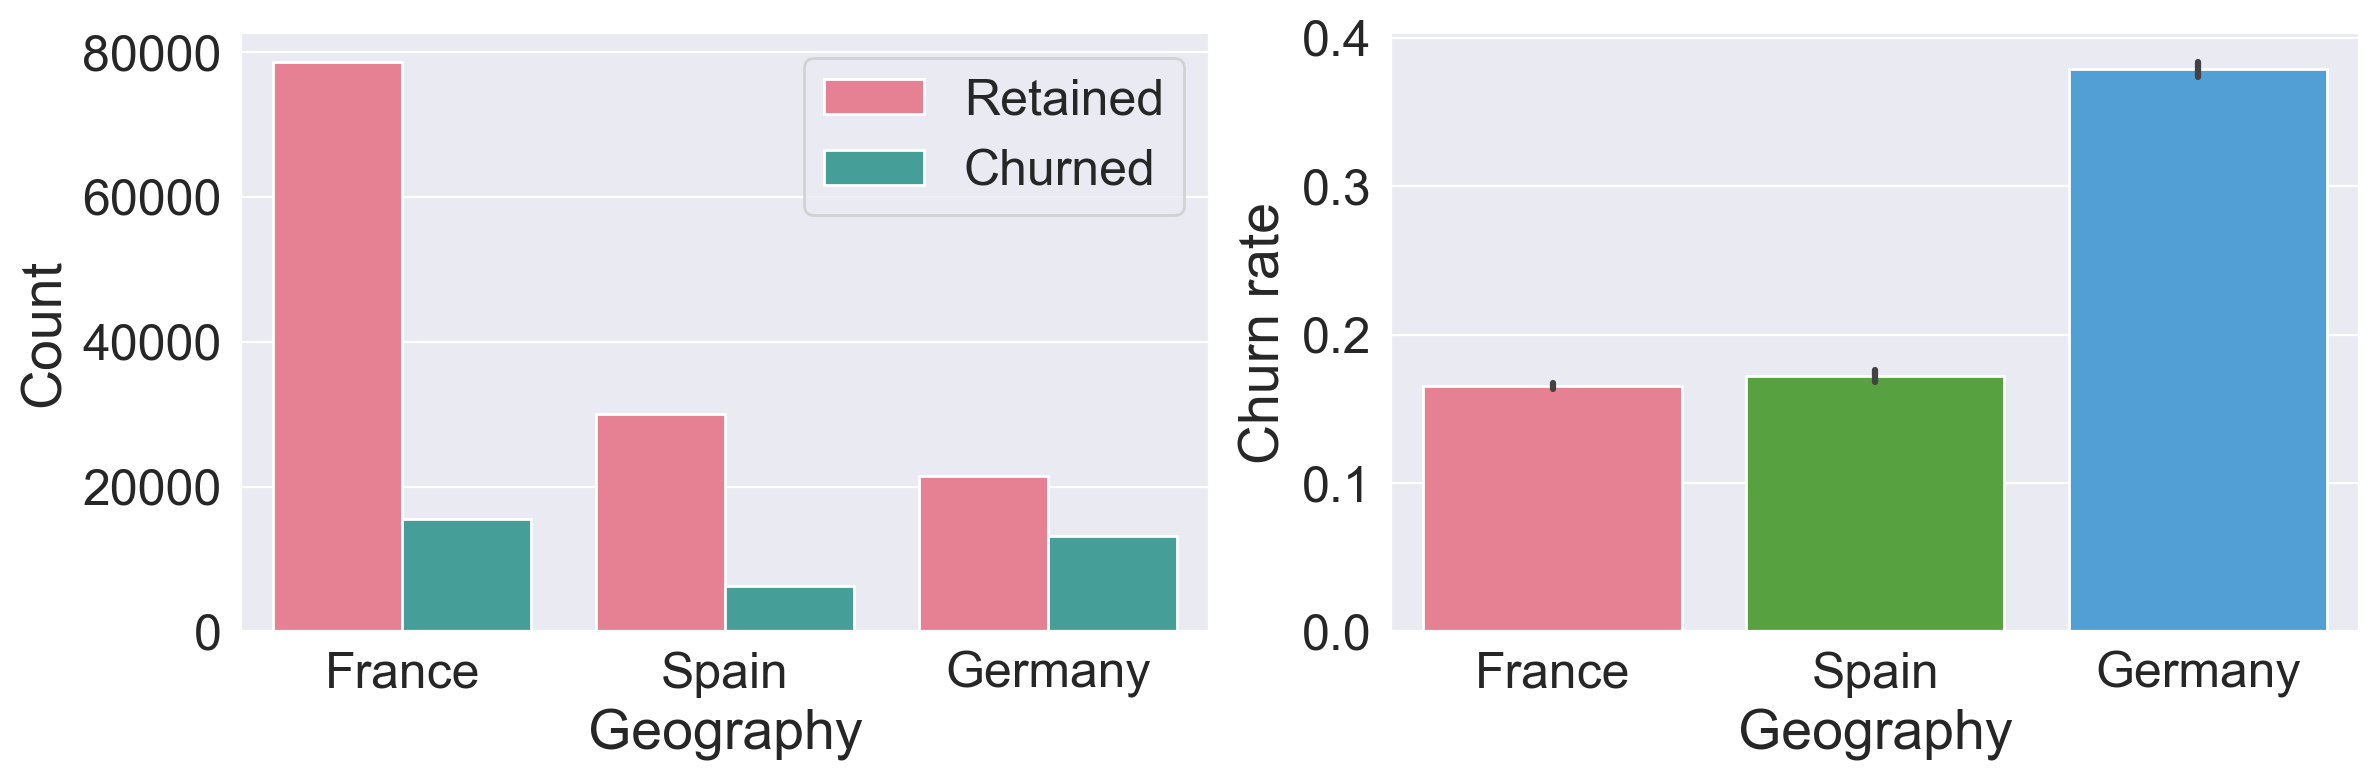

In [28]:
plot_categorical('Geography')

Les clients français et allemands sont plus susceptibles de se désabonner que les clients espagnols (le taux de désabonnement est presque deux fois plus élevé que celui de l'Espagne ). De nombreuses raisons peuvent expliquer ce résultat, comme une concurrence plus forte ou des préférences différentes pour les clients allemands.

### Gender

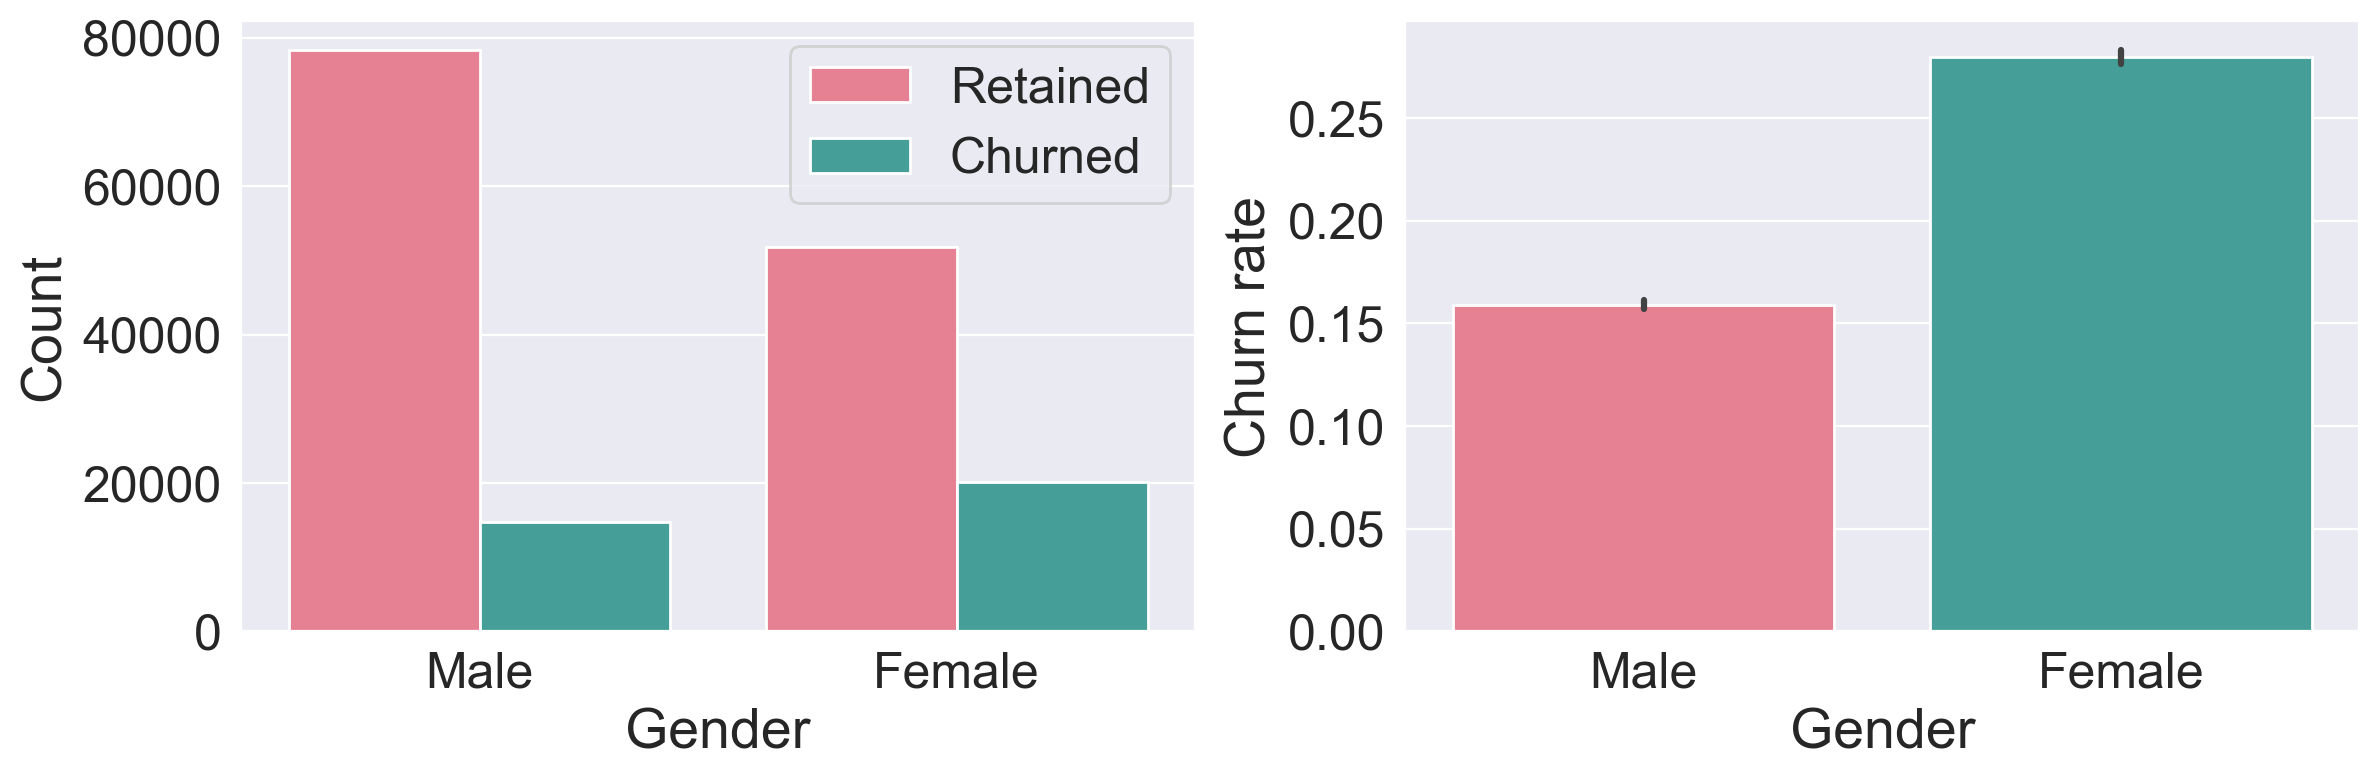

In [29]:
plot_categorical('Gender')

Les clientes féminines sont plus susceptibles de se désister.

### Tenure

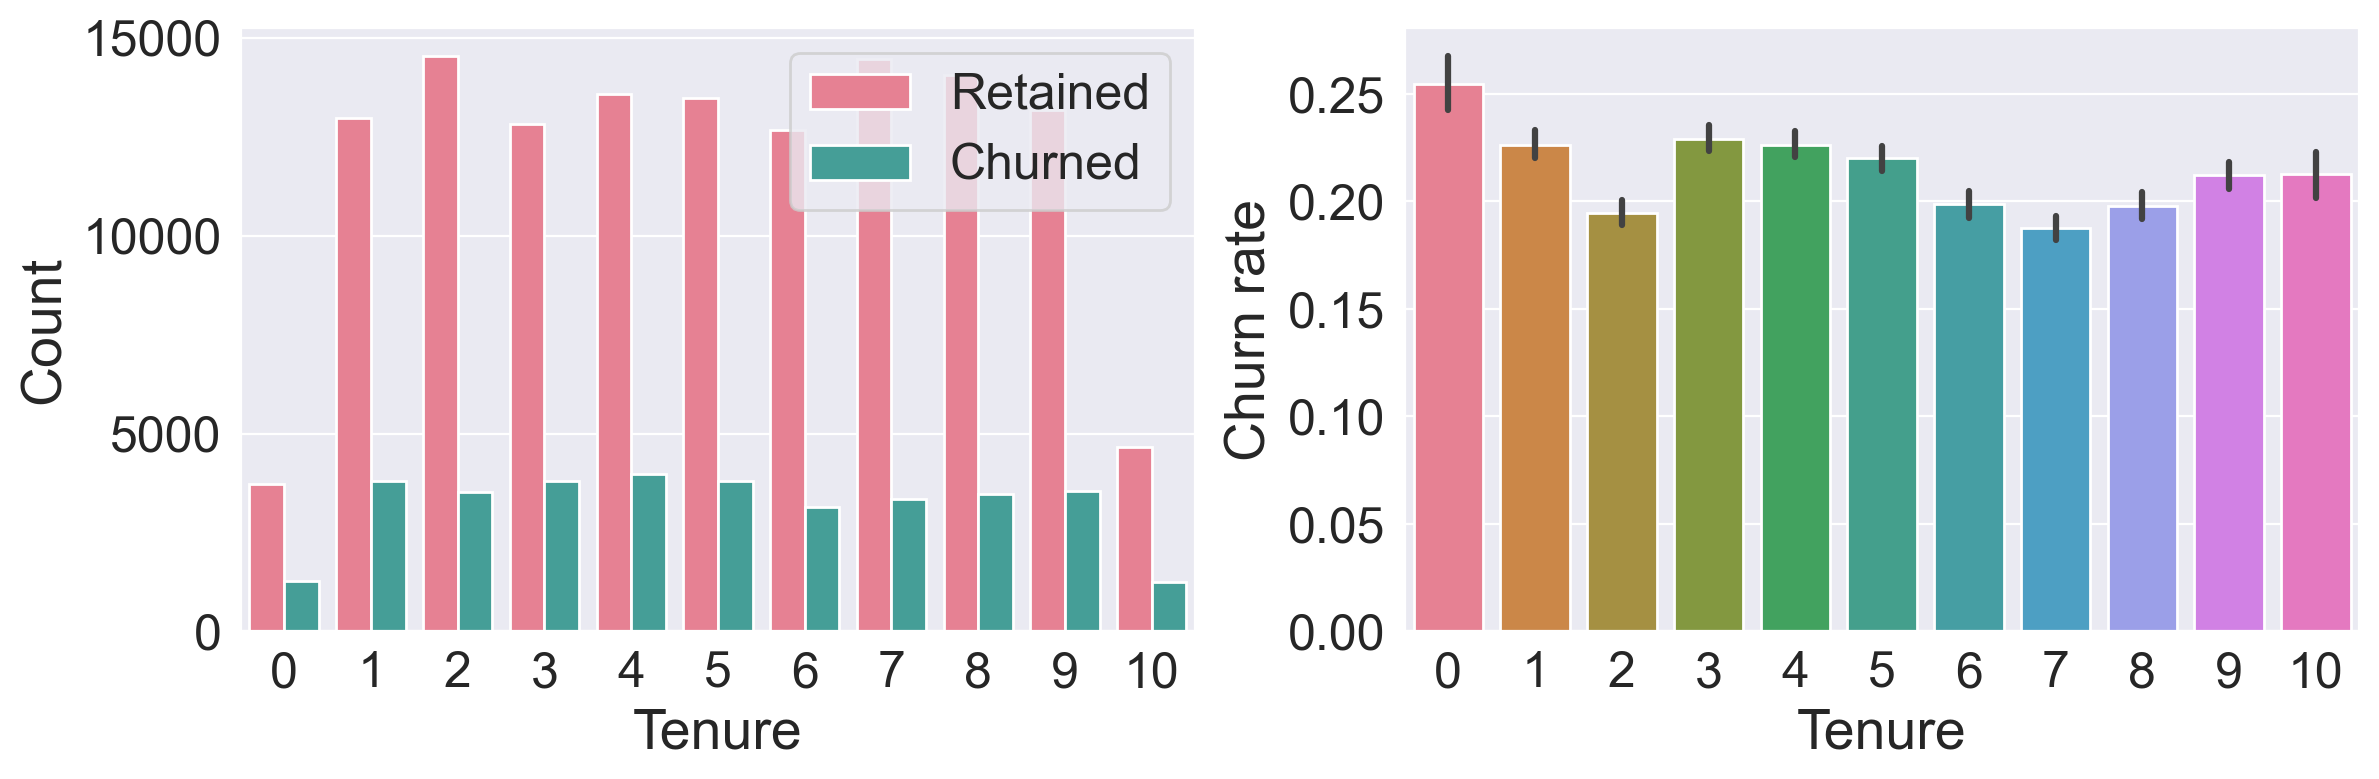

In [30]:
plot_categorical('Tenure')

Le nombre d'années (tenure) ne semble pas affecter le taux d'attrition.

### Number of Products

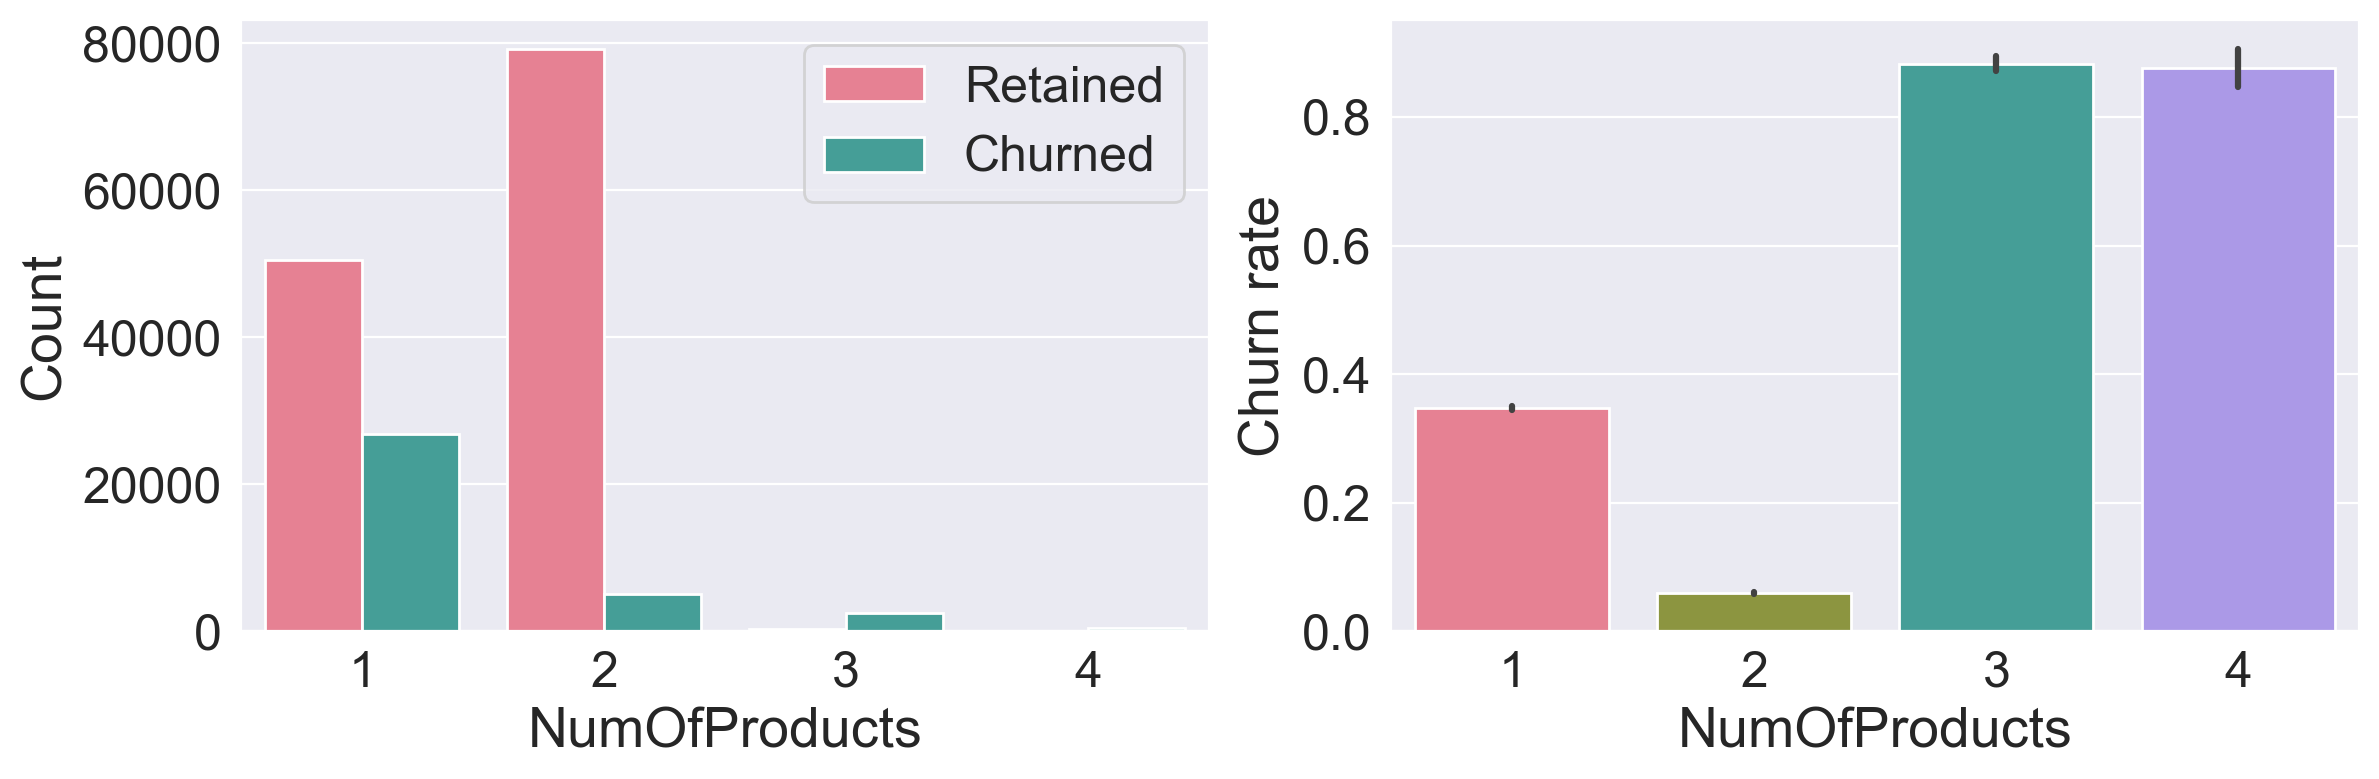

In [31]:
plot_categorical('NumOfProducts')

Il est intéressant de noter que le fait d’avoir 3 ou 4 produits augmente considérablement le risque de désabonnement. Je ne sais pas comment interpréter ce résultat. Cela pourrait potentiellement signifier que la banque ne peut pas soutenir correctement ses clients avec davantage de produits, ce qui à son tour accroît leur mécontentement.

### Card Holders

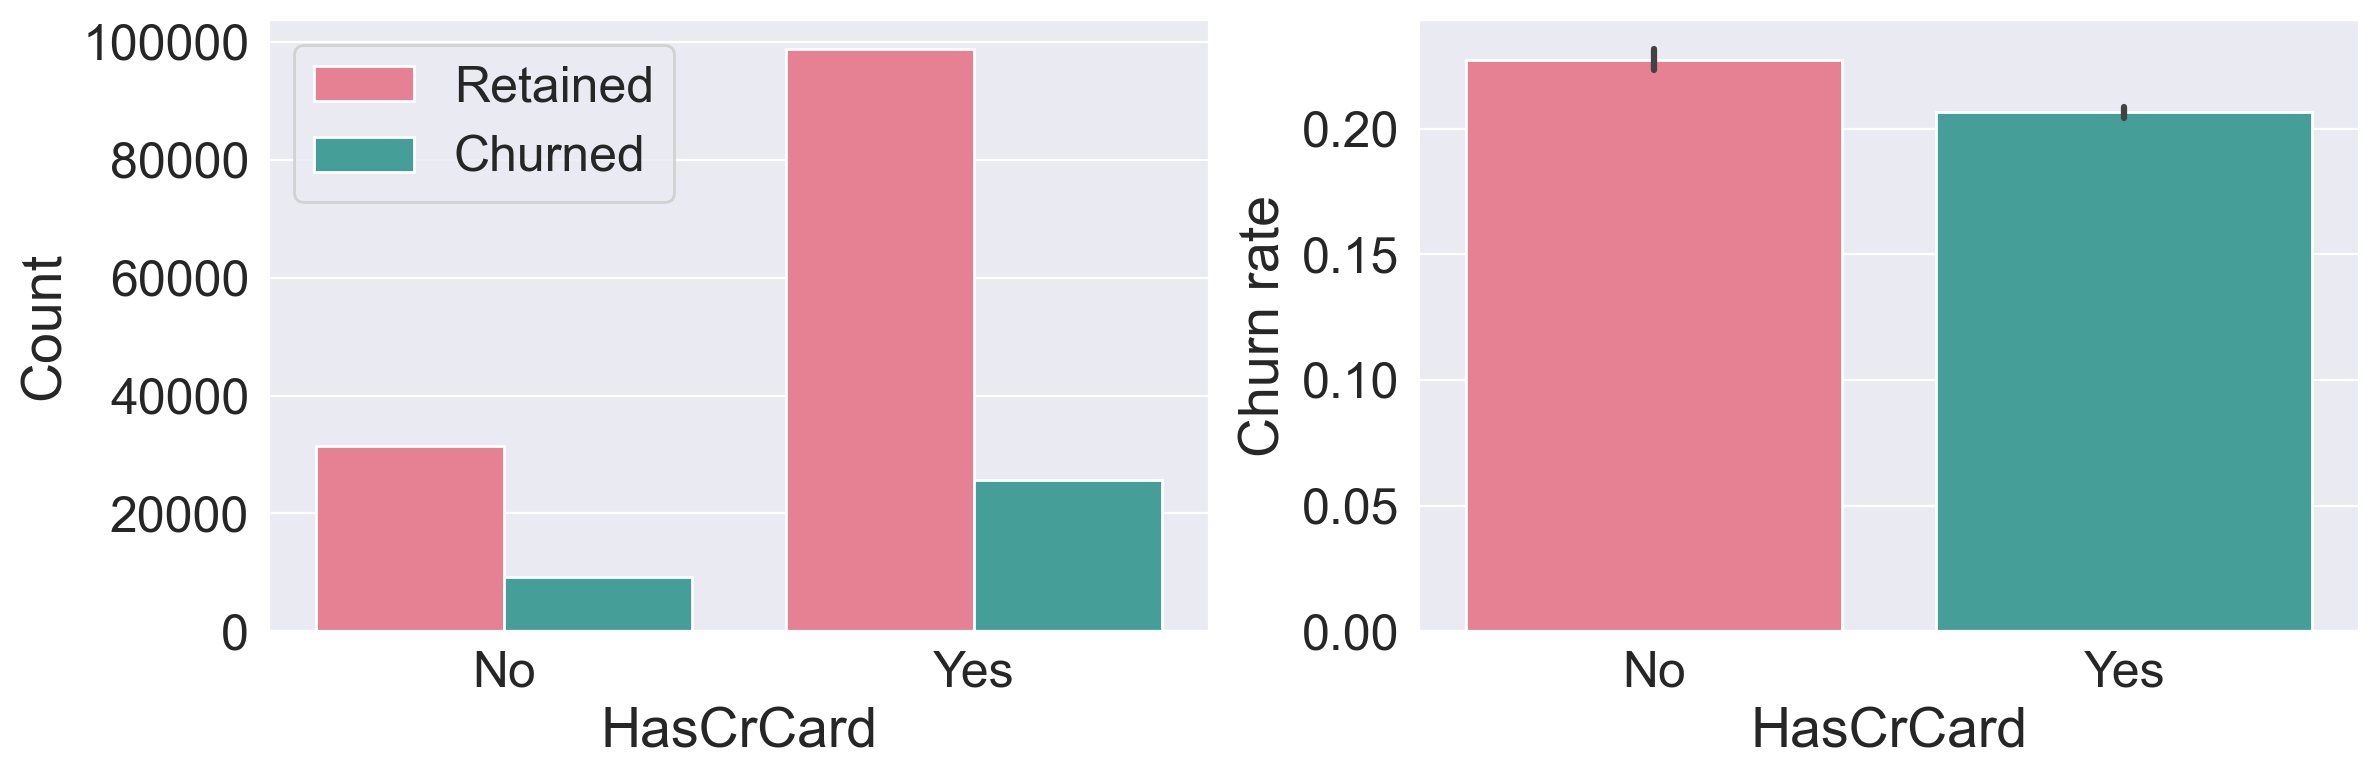

In [32]:
plot_categorical('HasCrCard')

Avoir une carte de crédit ne semble pas affecter le taux de désabonnement.

### Active Members

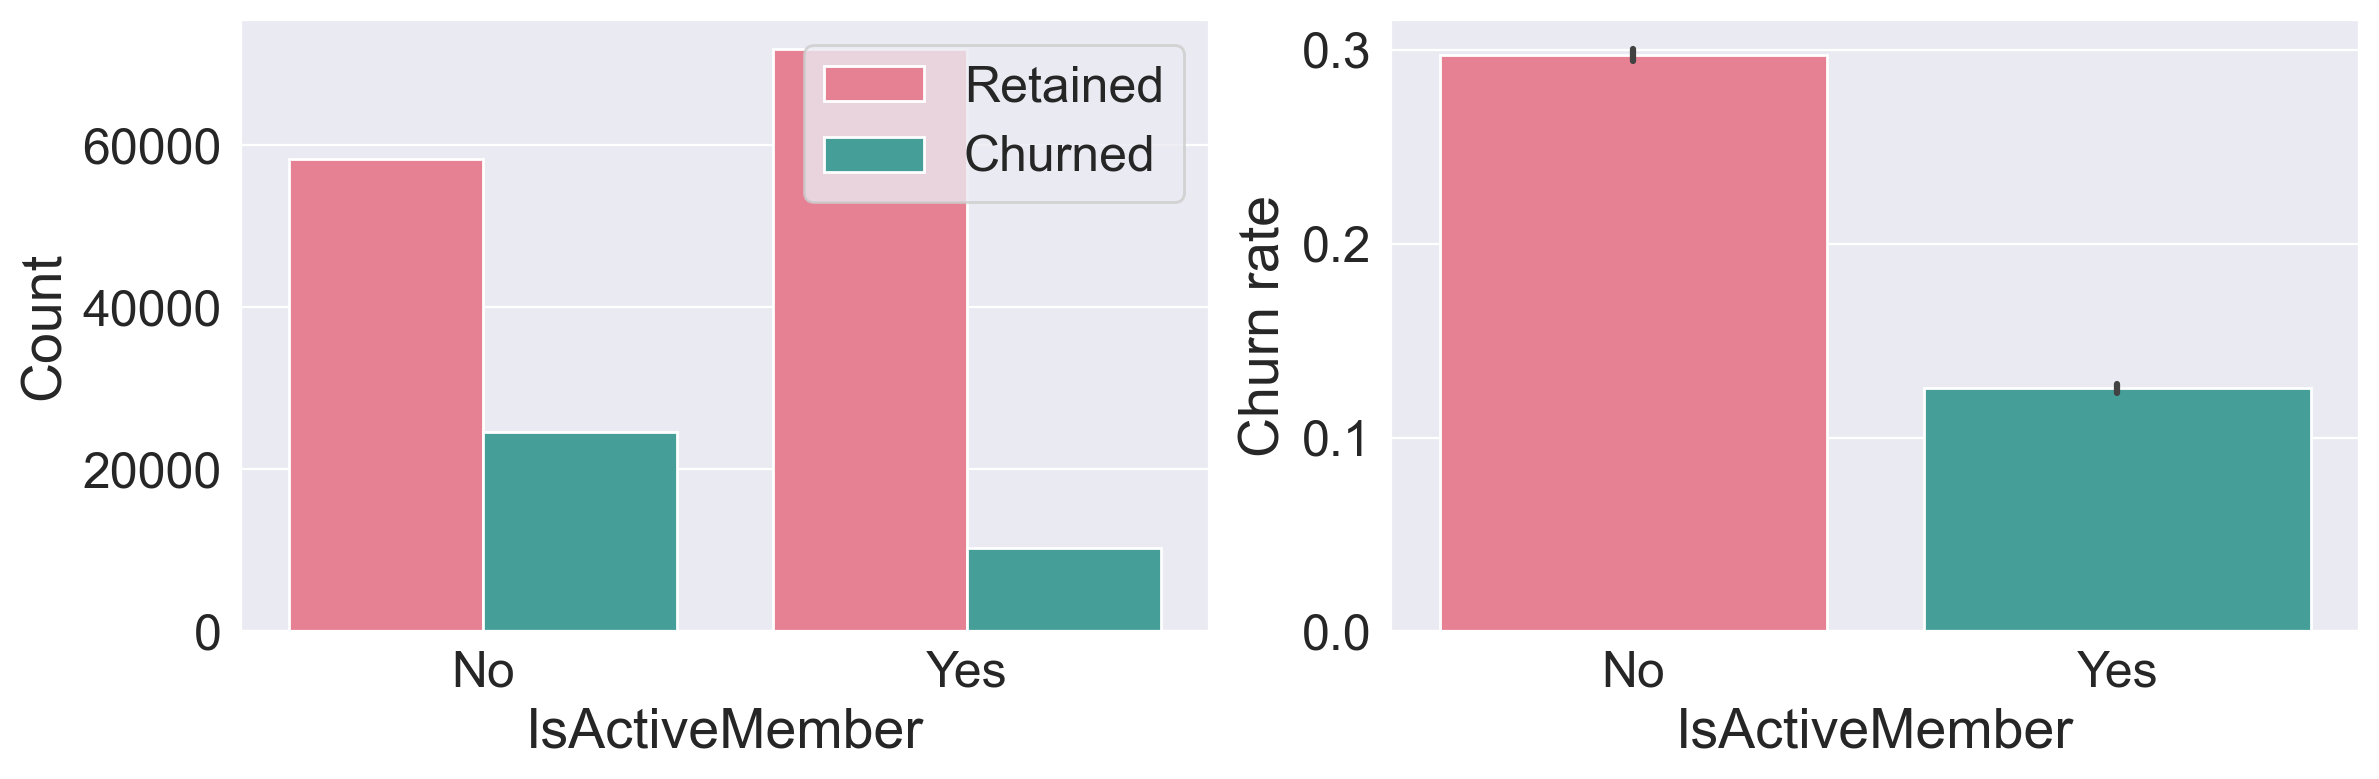

In [33]:
plot_categorical('IsActiveMember')

Il n'est pas surprenant que les clients inactifs soient plus susceptibles de se désinscrire. Une partie importante de la clientèle est inactive ; par conséquent, la banque gagnerait à modifier sa politique afin que davantage de clients deviennent actifs.

<br>

# Prétraitement des données

Le prétraitement des données consiste à convertir les données brutes en un format bien lisible, adapté à la construction et à l'entraînement de modèles d'apprentissage automatique.

Nous allons suivre ce processus étape par étape.

## Sélection des caractéristiques

Nous avons déjà effectué une sélection des caractéristiques en supprimant les colonnes « RowNumber », « CustomerId » et « Surname » au début de notre carnet. L'EDA a révélé plusieurs autres caractéristiques qui peuvent être supprimées car elles n'apportent aucune valeur à la prédiction de notre variable cible :

- EstimatedSalary » affiche une distribution uniforme pour les deux types de clients et peut être supprimée.
- Les catégories « Tenure » et « HasCrCard » ont un taux de désabonnement similaire et sont jugées redondantes. Cela peut être confirmé par un test du chi carré  :

- **Mais pour des mésures de précaution, nous n'allons pas supprimer ces variables, car elles peuvent avoir un poids plus important dans le modèle.

In [34]:
chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(train_df[column], train_df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
0,Geography,7358.673765,0.000000e+00
3,IsActiveMember,7293.408511,0.000000e+00
1,Gender,3538.452550,0.000000e+00
2,HasCrCard,80.780230,2.522693e-19


Les résultats montrent clairement que la géographie, le statut de membre actif, le genre et la possession d'une carte de crédit sont tous des facteurs importants associés au churn des clients de la banque. Parmi ceux-ci, la géographie et le statut de membre actif sont les plus fortement associés au churn, suggérant qu'ils devraient être des cibles prioritaires pour les efforts de rétention. En utilisant ces informations, la banque peut développer des stratégies de rétention plus ciblées et efficaces, par exemple en adaptant les approches marketing par région ou en augmentant les efforts pour rendre les clients plus actifs.

### Lien entre entre la variable cible et les variables quantitatives

In [35]:
import pandas as pd
from scipy.stats import ttest_ind

# Variables quantitatives à comparer
quantitative_variables = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

# Séparer les données en fonction des catégories
group_A = train_df[train_df['Exited'] == 1]
group_B = train_df[train_df['Exited'] == 0 ]

# Effectuer le test t de Student pour chaque variable quantitative
for variable in quantitative_variables:
    t_statistic, p_value = ttest_ind(group_A[variable], group_B[variable])
    print(f"Variable: {variable}")
    print("Test t de Student :")
    print("Statistique de test :", t_statistic)
    print("p-value :", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Il y a une différence significative entre les moyennes des deux groupes.")
    else:
        print("Il n'y a pas de différence significative entre les moyennes des deux groupes.")
    print()


Variable: Age
Test t de Student :
Statistique de test : 147.2472403347262
p-value : 0.0
Il y a une différence significative entre les moyennes des deux groupes.

Variable: CreditScore
Test t de Student :
Statistique de test : -11.128116005299207
p-value : 9.373557251570065e-29
Il y a une différence significative entre les moyennes des deux groupes.

Variable: Balance
Test t de Student :
Statistique de test : 53.156202840957384
p-value : 0.0
Il y a une différence significative entre les moyennes des deux groupes.

Variable: EstimatedSalary
Test t de Student :
Statistique de test : 7.649581965635489
p-value : 2.027177371186941e-14
Il y a une différence significative entre les moyennes des deux groupes.

Variable: Tenure
Test t de Student :
Statistique de test : -7.949569632427535
p-value : 1.8833179416314184e-15
Il y a une différence significative entre les moyennes des deux groupes.

Variable: NumOfProducts
Test t de Student :
Statistique de test : -89.23898211813093
p-value : 0.0
Il y 

Les résultats des tests t de Student montrent que toutes les variables étudiées (âge, score de crédit, solde, salaire estimé, tenure et nombre de produits) ont des différences significatives entre les moyennes des groupes churned et retained. Cela signifie que ces variables sont des facteurs importants associés au comportement de churn des clients de la banque. En utilisant ces informations, la banque peut développer des modèles prédictifs plus précis et des stratégies de rétention plus ciblées pour réduire le churn.

In [36]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Enregistrement de la base

In [ ]:
# Exporter les données vers un fichier CSV
df.to_csv('train_df.csv', index=False)  

### Creating a Test set

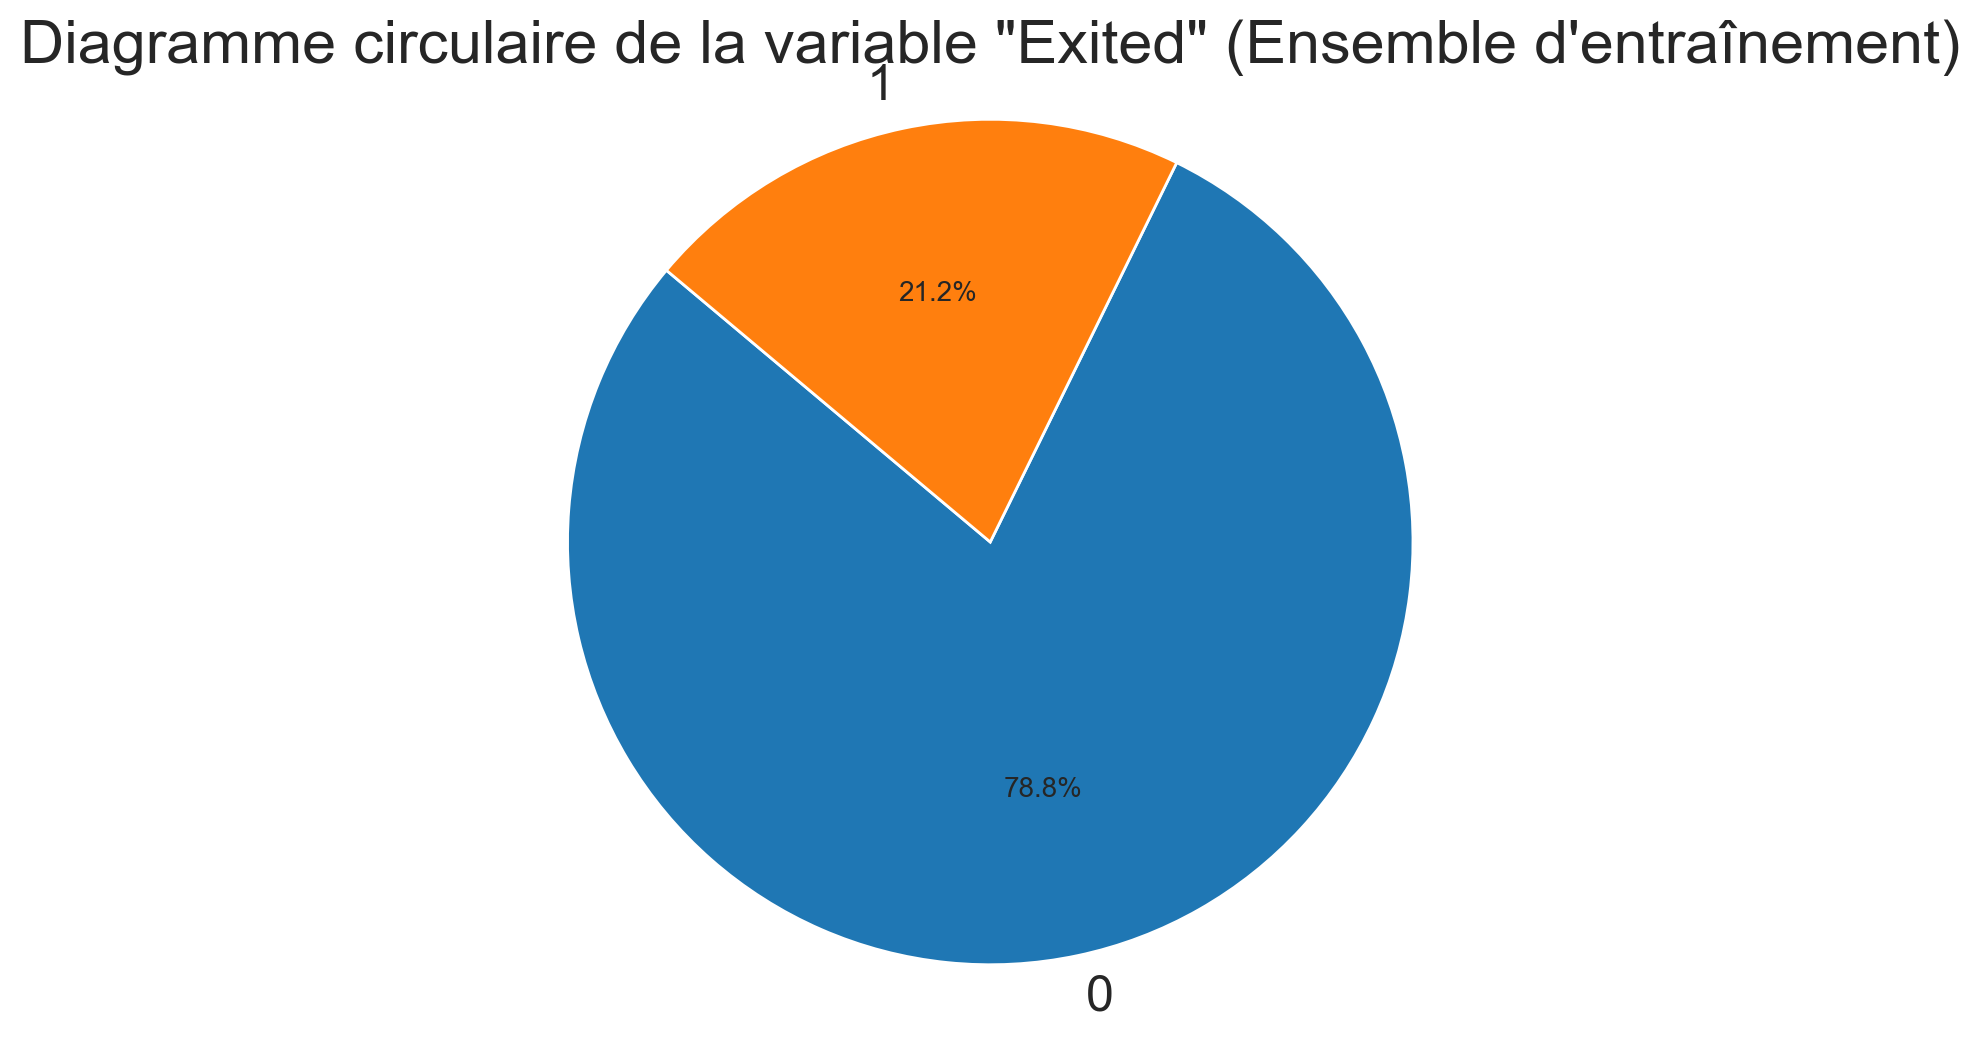

Répartition de la variable cible dans l'ensemble d'entraînement :
Exited
0    104090
1     27937
Name: count, dtype: int64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Diviser les données en variables explicatives (X) et variable cible (y)
X = train_df.drop('Exited', axis=1)
y = train_df['Exited']

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Compter les occurrences de chaque catégorie dans l'ensemble d'entraînement
train_exit_counts = y_train.value_counts()

# Créer le diagramme circulaire pour l'ensemble d'entraînement
plt.figure(figsize=(6, 6))
plt.pie(train_exit_counts, labels=train_exit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagramme circulaire de la variable "Exited" (Ensemble d\'entraînement)')
plt.axis('equal')  # Assurer que le cercle est de forme circulaire
plt.show()

# Afficher la répartition de la variable cible dans l'ensemble d'entraînement
print("Répartition de la variable cible dans l'ensemble d'entraînement :")
print(train_exit_counts)


In [38]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,
112149,726,France,Female,35.0,1,0.00,2,1.0,1.0,141466.85
70095,481,France,Female,37.0,8,152303.66,2,1.0,0.0,175082.20
29247,583,France,Female,35.0,5,0.00,1,0.0,0.0,102581.11
161355,644,France,Female,32.0,7,0.00,2,1.0,0.0,77965.67
105992,709,France,Male,29.0,5,128548.49,1,1.0,1.0,140941.47


# Preprocessing

**Ici, nous n'avons fait qu'écrire les fonctions d'encodage et de normalisation des variables, mais nous n'avons pas appliquer à nos variabes. De crainte de l'appliquer 2 fois aux variables, nous allons le laisser ici, et nous allons faire allusion à ces fonctions en construisant nos pipeline.** 

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin  # Import manquant
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
# Transformer personnalisé pour le Label Encoding de 'Gender'
class GenderLabelEncoder(TransformerMixin):
    def __init__(self):
        self.le = LabelEncoder()

    def fit(self, X, y=None):
        self.le.fit(X)
        return self

    def transform(self, X):
        X = X.copy()
        X['Gender'] = self.le.transform(X['Gender']).reshape(-1, 1)  # Reshape pour obtenir une sortie 2D
        return X

    def get_params(self, deep=True):
        return {}



# Construction du pipeline pour le prétraitement des données
preprocessor = ColumnTransformer(
    transformers=[
        ('gender', OneHotEncoder(drop='first'), ['Gender']),  # Utilisation de OneHotEncoder pour Gender
        ('geography', OneHotEncoder(drop='first'), ['Geography']),  # Utilisation de OneHotEncoder pour Geography
        ('num', StandardScaler(), ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts'])  # Standardisation pour les colonnes numériques
    ],
    remainder='passthrough'  # Conserver les colonnes non spécifiées
)
